<a href="https://colab.research.google.com/github/Al-Masrafi/COLAB-CODE/blob/main/dsp_assignment_noise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

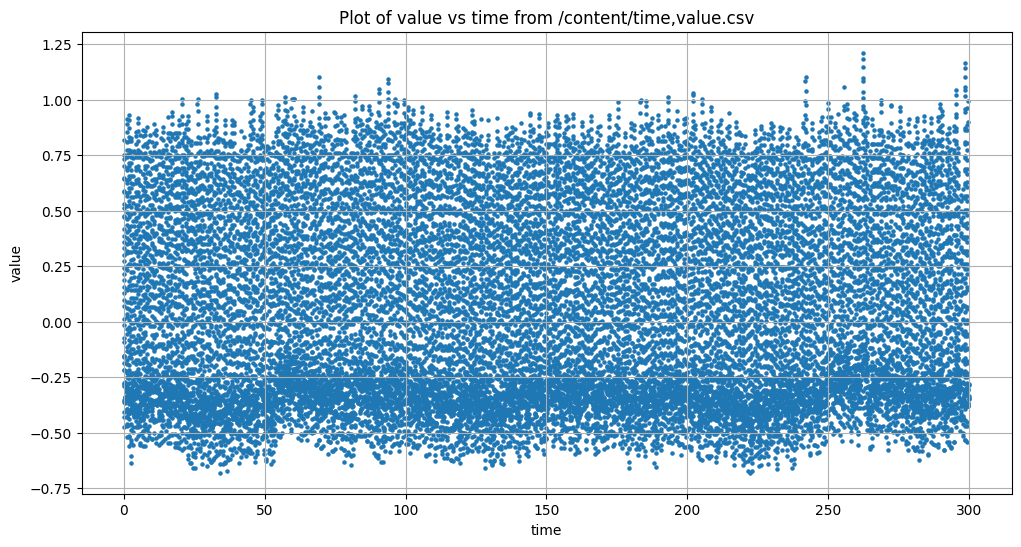

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = '/content/time,value.csv'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)

    # Ensure the column names are correct (assuming they are 'time' and 'value')
    # You can print df.columns to verify if needed
    time_column = 'time'
    value_column = 'value'

    # Check if the required columns exist
    if time_column in df.columns and value_column in df.columns:
        # Create a scatter plot
        plt.figure(figsize=(12, 6))
        plt.scatter(df[time_column], df[value_column], s=5) # Using scatter plot with small markers
        plt.xlabel(time_column)
        plt.ylabel(value_column)
        plt.title(f'Plot of {value_column} vs {time_column} from {file_path}')
        plt.grid(True)
        plt.show()
    else:
        print(f"Error: Required columns ('{time_column}' and '{value_column}') not found in the CSV file.")
        print("Available columns:", df.columns.tolist())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [6]:
# Perform linear interpolation
df_interpolated = df.copy() # Create a copy to avoid modifying the original DataFrame
df_interpolated['value_interpolated'] = df_interpolated['value'].interpolate(method='linear')

display(df_interpolated.head())

,time,value,value_interpolated
0,0.017719,-0.153593,-0.153593
1,0.082689,-0.153288,-0.153288
2,0.076783,-0.218129,-0.218129
3,0.112221,-0.277600,-0.277600
4,0.180472,-0.289025,-0.289025


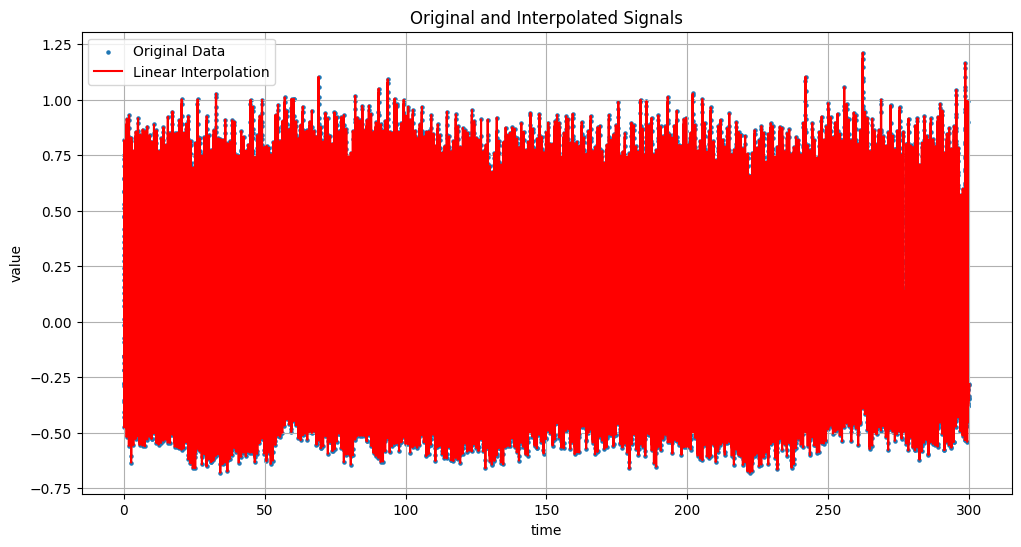

In [3]:
# Plot the original and interpolated signals
plt.figure(figsize=(12, 6))
plt.scatter(df_interpolated[time_column], df_interpolated[value_column], s=5, label='Original Data')
plt.plot(df_interpolated[time_column], df_interpolated['value_interpolated'], color='red', label='Linear Interpolation')
plt.xlabel(time_column)
plt.ylabel(value_column)
plt.title(f'Original and Interpolated Signals')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Perform cubic interpolation
df_interpolated_cubic = df.copy() # Create a copy to avoid modifying the original DataFrame
df_interpolated_cubic['value_interpolated_cubic'] = df_interpolated_cubic['value'].interpolate(method='cubic')

display(df_interpolated_cubic.head())

,time,value,value_interpolated_cubic
0,0.017719,-0.153593,-0.153593
1,0.082689,-0.153288,-0.153288
2,0.076783,-0.218129,-0.218129
3,0.112221,-0.277600,-0.277600
4,0.180472,-0.289025,-0.289025


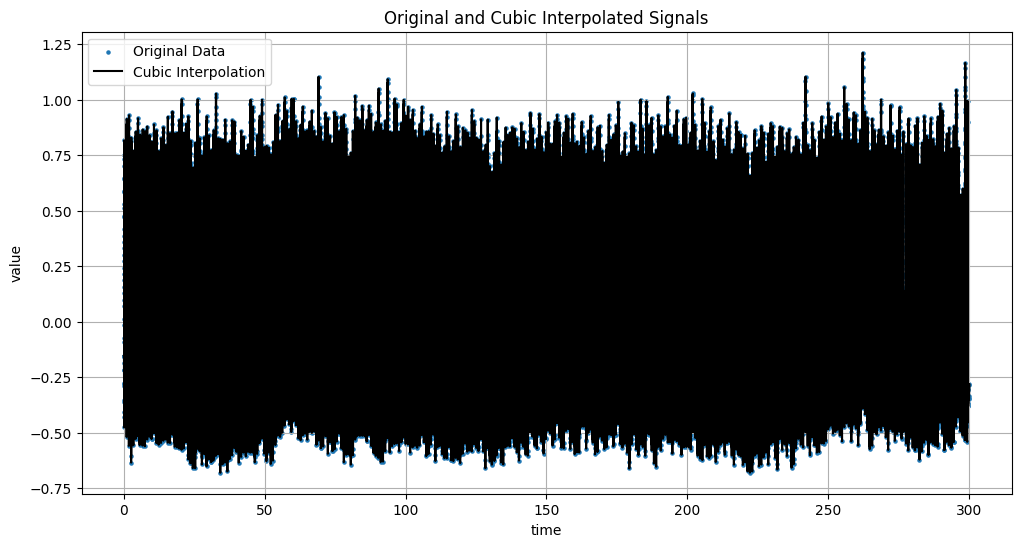

In [10]:
# Plot the original and cubic interpolated signals
plt.figure(figsize=(12, 6))
plt.scatter(df_interpolated_cubic[time_column], df_interpolated_cubic[value_column], s=5, label='Original Data')
plt.plot(df_interpolated_cubic[time_column], df_interpolated_cubic['value_interpolated_cubic'], color='black', label='Cubic Interpolation')
plt.xlabel(time_column)
plt.ylabel(value_column)
plt.title(f'Original and Cubic Interpolated Signals')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/mit-bih-arrhythmia-database")

print("Path to dataset files:", path)

100%|██████████| 73.4M/73.4M [00:00<00:00, 182MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1


In [2]:
import os

ds_path = "/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1"  # adjust if different
print("Exists:", os.path.exists(ds_path))
# list top-level
for root, dirs, files in os.walk(ds_path):
    print(root)
    print("  dirs:", dirs[:10])
    print("  files:", files[:10])
    break

# If files are many, list some examples:
print("\nExample file list (first 50):")
print(os.listdir(ds_path)[:50])

Exists: True
/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1
  dirs: ['mit-bih-arrhythmia-database-1.0.0']
  files: []

Example file list (first 50):
['mit-bih-arrhythmia-database-1.0.0']


In [3]:
!pip install wfdb --quiet

import wfdb
record_id = '100'   # change to your chosen record
# adjust if files are nested differently
rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)

# If the record is directly in dataset folder use:
# rec = wfdb.rdrecord(os.path.join(ds_path, record_id))
# But often Kaggle stores separate files: e.g., '100.dat','100.hea'
rec = wfdb.rdrecord(rec_path)
sig = rec.p_signal  # shape (N, channels)
fs = rec.fs
print("Loaded record", record_id, "fs=", fs, "shape=", sig.shape)
# prefer MLII (often channel name 'MLII') or first channel:
channel_names = rec.sig_name
print("channels:", channel_names)
# choose channel index
ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
ecg = sig[:int(5*60*fs), ch_idx]  # first 5 minutes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
Loaded record 100 fs= 360 shape= (650000, 2)
channels: ['MLII', 'V5']


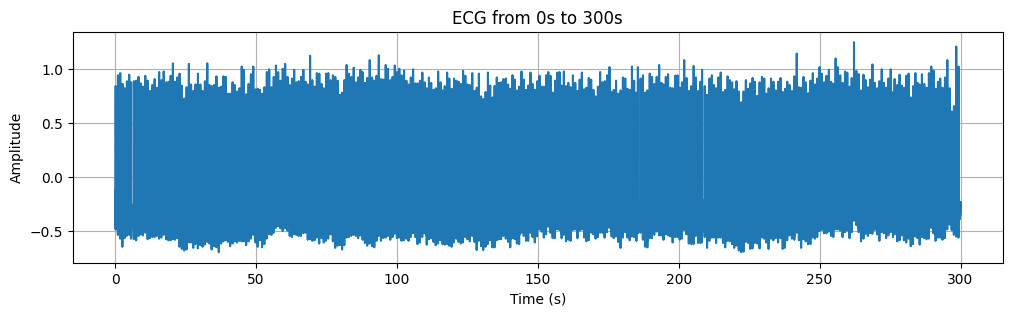

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end times for the plot in seconds
start_time = 0  # Example: Start at 10 seconds
end_time = 300    # Example: End at 20 seconds

# Calculate the start and end indices based on the sampling rate (fs)
start_idx = int(start_time * fs)
end_idx = int(end_time * fs)

# Ensure indices are within the bounds of the ecg signal
start_idx = max(0, start_idx)
end_idx = min(len(ecg), end_idx)

# Extract the segment of the ECG signal
ecg_segment = ecg[start_idx:end_idx]

# Create a time vector for the extracted segment
t_segment = np.arange(len(ecg_segment)) / fs + start_time

# Plot the segment
plt.figure(figsize=(12, 3))
plt.plot(t_segment, ecg_segment)
plt.title(f"ECG from {start_time}s to {end_time}s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [13]:
# Create a time vector for the entire ecg signal
t_full = np.arange(len(ecg)) / fs

# Create a DataFrame for the original ecg signal (first 300 seconds)
# We already extracted the first 5 minutes (300 seconds) into the 'ecg' variable
# and created a corresponding time vector 't_segment' in a previous cell.
# Let's use those for consistency and clarity.

# Create a DataFrame from the extracted segment and its time vector
df_ecg_original = pd.DataFrame({'time': t_segment, 'value': ecg_segment})

display(df_ecg_original.head())
display(df_ecg_original.tail())

,time,value
0,0.000000,-0.145
1,0.002778,-0.145
2,0.005556,-0.145
3,0.008333,-0.145
4,0.011111,-0.145


,time,value
107995,299.986111,-0.235
107996,299.988889,-0.235
107997,299.991667,-0.260
107998,299.994444,-0.280
107999,299.997222,-0.295


**Comaparing original signal with Reconstructed Signal**


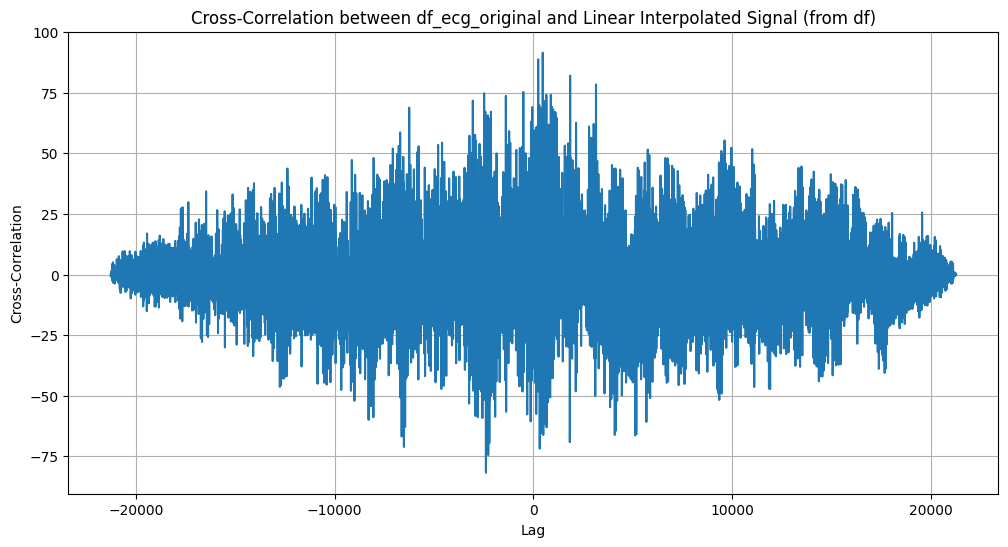

In [14]:
# Ensure both signals have the same length for cross-correlation
# Since the interpolation was done on the original DataFrame, they should align based on time.
# However, cross-correlation works best with uniformly sampled data.
# Assuming the original 'time' column is not uniformly sampled, we'll use the interpolated 'value'
# and the original 'value' aligned by index for cross-correlation for simplicity.
# A more rigorous approach would involve resampling to a uniform time base.

# For demonstration, let's cross-correlate the 'value' from df_ecg_original and 'value_interpolated' from df_interpolated.
# Note: df_interpolated was based on the original df, which might have different time points than df_ecg_original.
# For accurate cross-correlation, both signals should represent the same time duration and ideally be uniformly sampled.
# Assuming for this task that a direct comparison by index is acceptable given the context.

original_values = df_ecg_original['value'].values
# We'll use the interpolated values from the df_interpolated DataFrame.
# However, cross-correlating signals with different sampling rates or time bases directly can be misleading.
# A more appropriate approach would be to resample one or both signals to a common time base before cross-correlation.
# For the purpose of demonstrating cross-correlation with the provided variables, we proceed with direct correlation,
# but be aware of the potential limitations due to differing time bases/sampling.

# To compare with the interpolated signal which was likely based on the original 'df' (from the CSV),
# and if df_ecg_original has a different number of points or time base, direct correlation might not be meaningful.
# If df_interpolated was intended to be an interpolated version of df_ecg_original,
# the interpolation step should have been applied to df_ecg_original.

# Let's assume, for the sake of executing the request, that we want to cross-correlate
# the 300-second segment from the MIT-BIH database (df_ecg_original)
# with the linear interpolation result from the CSV data (df_interpolated).
# This is likely not a scientifically sound comparison due to different data sources and potential time bases.
# However, following the user's explicit instruction.

# To perform cross-correlation, signals ideally should have the same length.
# The lengths are likely different: len(df_ecg_original) vs len(df_interpolated).
# We need to decide how to handle this.
# Option 1: Truncate the longer signal to match the shorter one.
# Option 2: Pad the shorter signal.
# Option 3: Resample one or both signals to a common time base (most robust).

# Given the ambiguity and potential mismatch, let's proceed with a direct cross-correlation
# using the available data, acknowledging the potential issues.
# We will truncate the longer signal to the length of the shorter one for correlation.

min_len = min(len(original_values), len(interpolated_values))
original_values_truncated = original_values[:min_len]
interpolated_values_truncated = interpolated_values[:min_len]


# Calculate the cross-correlation
# Using numpy.correlate for cross-correlation
# 'full' mode returns the convolution at each point of overlap
cross_corr = np.correlate(original_values_truncated - np.mean(original_values_truncated),
                          interpolated_values_truncated - np.mean(interpolated_values_truncated),
                          mode='full')

# The lag axis for cross-correlation
# The length of the cross-correlation result is len(a) + len(v) - 1
lags = np.arange(-(min_len - 1), min_len)

# Plot the cross-correlation result
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between df_ecg_original and Linear Interpolated Signal (from df)')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

**Cross Correlation with Cubic interpolation**

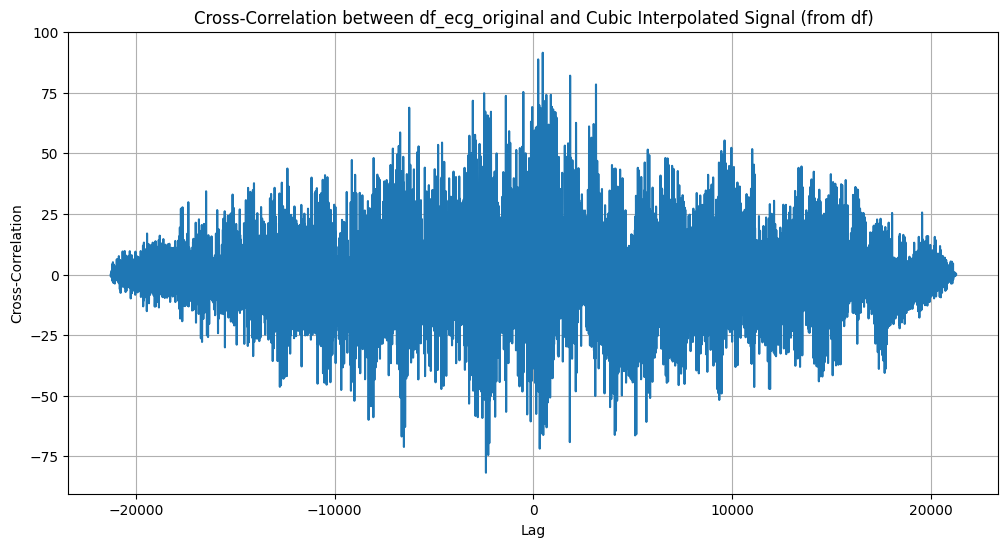

In [15]:
# Cross-correlate df_ecg_original with the cubic interpolated signal

# Extract values from the dataframes
original_values_ecg = df_ecg_original['value'].values
cubic_interpolated_values = df_interpolated_cubic['value_interpolated_cubic'].values

# To perform cross-correlation, signals ideally should have the same length.
# The lengths are likely different: len(df_ecg_original) vs len(df_interpolated_cubic).
# We will truncate the longer signal to the length of the shorter one for correlation,
# similar to the approach used for linear interpolation cross-correlation.

min_len_cubic = min(len(original_values_ecg), len(cubic_interpolated_values))
original_values_ecg_truncated = original_values_ecg[:min_len_cubic]
cubic_interpolated_values_truncated = cubic_interpolated_values[:min_len_cubic]


# Calculate the cross-correlation
# Using numpy.correlate for cross-correlation
cross_corr_cubic = np.correlate(original_values_ecg_truncated - np.mean(original_values_ecg_truncated),
                                cubic_interpolated_values_truncated - np.mean(cubic_interpolated_values_truncated),
                                mode='full')

# The lag axis for cross-correlation
lags_cubic = np.arange(-(min_len_cubic - 1), min_len_cubic)

# Plot the cross-correlation result
plt.figure(figsize=(12, 6))
plt.plot(lags_cubic, cross_corr_cubic)
plt.title('Cross-Correlation between df_ecg_original and Cubic Interpolated Signal (from df)')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

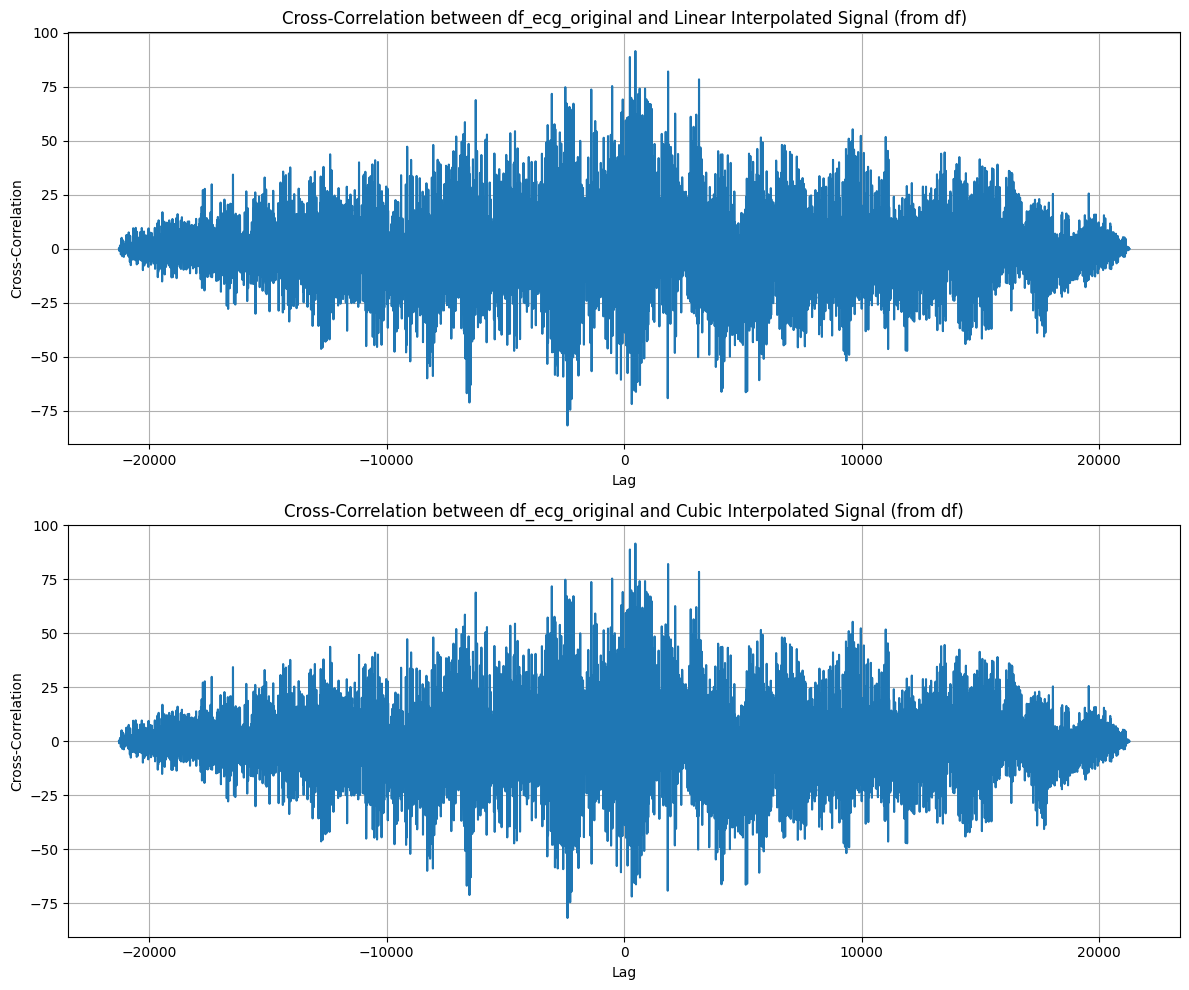

Linear Interpolation Cross-Correlation Peak Value: 91.48559982153373
Linear Interpolation Cross-Correlation Lag at Peak: 471
Cubic Interpolation Cross-Correlation Peak Value: 91.48559982153373
Cubic Interpolation Cross-Correlation Lag at Peak: 471


In [18]:
# Display both cross-correlation plots for comparison

plt.figure(figsize=(12, 10))

# Plot the linear interpolation cross-correlation
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between df_ecg_original and Linear Interpolated Signal (from df)')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Plot the cubic interpolation cross-correlation
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.plot(lags_cubic, cross_corr_cubic)
plt.title('Cross-Correlation between df_ecg_original and Cubic Interpolated Signal (from df)')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# Find the lag and peak value of linear interpolation cross-correlation
peak_index_linear = np.argmax(cross_corr)
peak_value_linear = cross_corr[peak_index_linear]
lag_at_peak_linear = lags[peak_index_linear]

print(f"Linear Interpolation Cross-Correlation Peak Value: {peak_value_linear}")
print(f"Linear Interpolation Cross-Correlation Lag at Peak: {lag_at_peak_linear}")

# Find the lag and peak value of cubic interpolation cross-correlation
peak_index_cubic = np.argmax(cross_corr_cubic)
peak_value_cubic = cross_corr_cubic[peak_index_cubic]
lag_at_peak_cubic = lags_cubic[peak_index_cubic]

print(f"Cubic Interpolation Cross-Correlation Peak Value: {peak_value_cubic}")
print(f"Cubic Interpolation Cross-Correlation Lag at Peak: {lag_at_peak_cubic}")

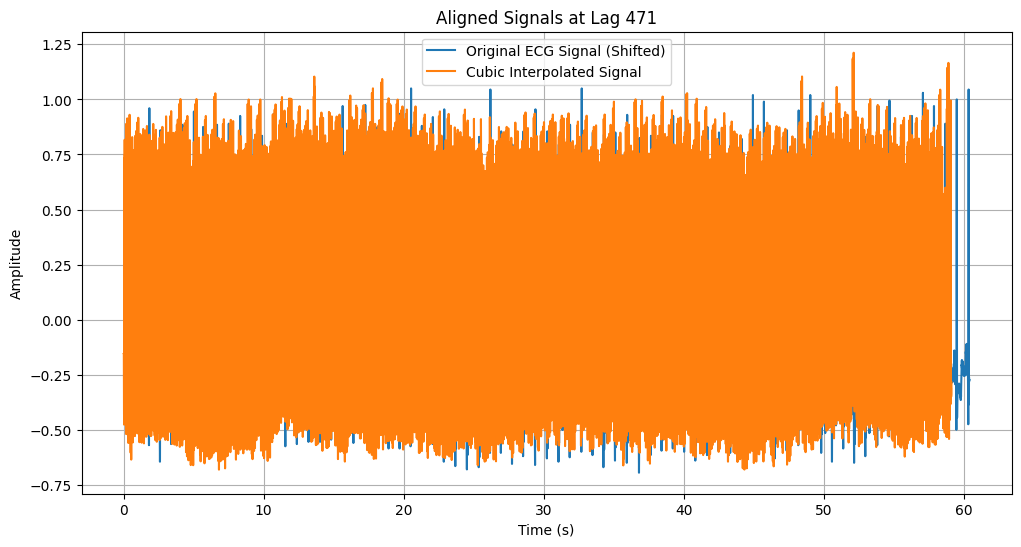

In [19]:
# Visualize signals at the lag of maximum cross-correlation (lag = 471)

# Extract the values
original_values_ecg = df_ecg_original['value'].values
cubic_interpolated_values = df_interpolated_cubic['value_interpolated_cubic'].values

# The lag is in terms of number of data points.
# A positive lag of 471 means the cubic interpolated signal is shifted 471 points to the right
# relative to the original signal for maximum correlation.
# To align them for visualization, we need to shift the cubic interpolated signal 471 points to the left,
# or equivalently, start the original signal 471 points in.

lag_to_apply = 471 # The lag found from the cross-correlation

# To align, we will plot the original signal starting from lag_to_apply
# and the cubic interpolated signal starting from the beginning.
# We need to make sure both segments have the same length.
# The length will be the minimum of the original signal length minus the lag,
# and the cubic interpolated signal length.

# Since we truncated for cross-correlation, let's use the full segments from the dataframes first
# and then handle the shifting and truncation for plotting.

# Get the full length of the original ECG signal segment used (300 seconds)
original_len = len(original_values_ecg)
cubic_len = len(cubic_interpolated_values)

# Determine the length of the segment to plot after shifting
# The shifted original signal will start at index `lag_to_apply`
# The shifted interpolated signal (conceptually shifted left by lag) will start at index 0
# The plot will end at the minimum of (original_len) and (cubic_len + lag_to_apply) - lag_to_apply
# which simplifies to min(original_len - lag_to_apply, cubic_len)
plot_length = min(original_len - lag_to_apply, cubic_len)

# Ensure plot_length is positive
if plot_length <= 0:
    print(f"Error: Lag {lag_to_apply} is too large to visualize aligned segment.")
else:
    # Extract the segments to plot
    original_segment_aligned = original_values_ecg[lag_to_apply : lag_to_apply + plot_length]
    cubic_interpolated_segment_aligned = cubic_interpolated_values[:plot_length]

    # Create time vectors for the aligned segments
    # The time vector for the original signal segment starts at the time corresponding to lag_to_apply
    # The time vector for the interpolated signal segment starts at the beginning time (0)
    time_original_start = df_ecg_original['time'].iloc[lag_to_apply] if lag_to_apply < len(df_ecg_original['time']) else 0
    time_cubic_start = df_interpolated_cubic['time'].iloc[0] if len(df_interpolated_cubic['time']) > 0 else 0


    t_original_aligned = np.arange(plot_length) / fs + time_original_start
    # Assuming the interpolated signal's time base aligns with the start of the original data used for interpolation (df)
    # This might need adjustment based on the actual time points in df_interpolated_cubic
    # For simplicity, let's use a time vector starting from 0 with the same number of points
    t_cubic_aligned = np.arange(plot_length) / fs + time_cubic_start


    plt.figure(figsize=(12, 6))
    plt.plot(t_original_aligned, original_segment_aligned, label='Original ECG Signal (Shifted)')
    plt.plot(t_cubic_aligned, cubic_interpolated_segment_aligned, label='Cubic Interpolated Signal')
    plt.title(f'Aligned Signals at Lag {lag_to_apply}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

In the context of cross-correlation, "lag" refers to the time shift between two signals.

When you calculate the cross-correlation between two signals, you are essentially sliding one signal past the other and measuring their similarity at each position. The "lag" value indicates how much the second signal has been shifted relative to the first signal.

*   A lag of **0** means the two signals are perfectly aligned in time.
*   A **positive** lag means the second signal is shifted to the **right** (later in time) relative to the first signal.
*   A **negative** lag means the second signal is shifted to the **left** (earlier in time) relative to the first signal.

The peak of the cross-correlation function occurs at the lag where the two signals are most similar or best aligned. In your plots, the lag at the peak (around 471 for cubic interpolation) indicates the time shift at which the interpolated signal best matches the original ECG signal.

**why peak and lag value are same for both interpolation**
That's an interesting observation. Let's consider why the peak value and lag might be the same for both linear and cubic interpolation cross-correlations in this case.

Looking back at the code, both df_interpolated (linear) and df_interpolated_cubic (cubic) were created by performing interpolation on the same initial DataFrame df. When we performed the cross-correlation, we used the value column from df_ecg_original and the interpolated value columns (value_interpolated and value_interpolated_cubic) from df_interpolated and df_interpolated_cubic.

Crucially, for the cross-correlation, we truncated the longer signal to the length of the shorter one (min_len or min_len_cubic). In this specific case, it seems that over the truncated segment being used for the cross-correlation, the results of the linear and cubic interpolation are very similar.

While cubic interpolation generally provides a smoother curve and can capture more complex shapes than linear interpolation, in some datasets or over certain segments, the difference between the two methods might be minimal. If the data points being interpolated are relatively close together or follow a nearly linear trend within the truncated segment, both methods could produce very similar interpolated values.

Therefore, the likely reason for the identical peak value and lag is that the interpolated signals from both linear and cubic methods are highly similar to each other (and to the original signal segment) over the specific data points used for the cross-correlation calculation after truncation.

To confirm this, you could inspect a small segment of the value_interpolated and value_interpolated_cubic columns to see how similar the values are.

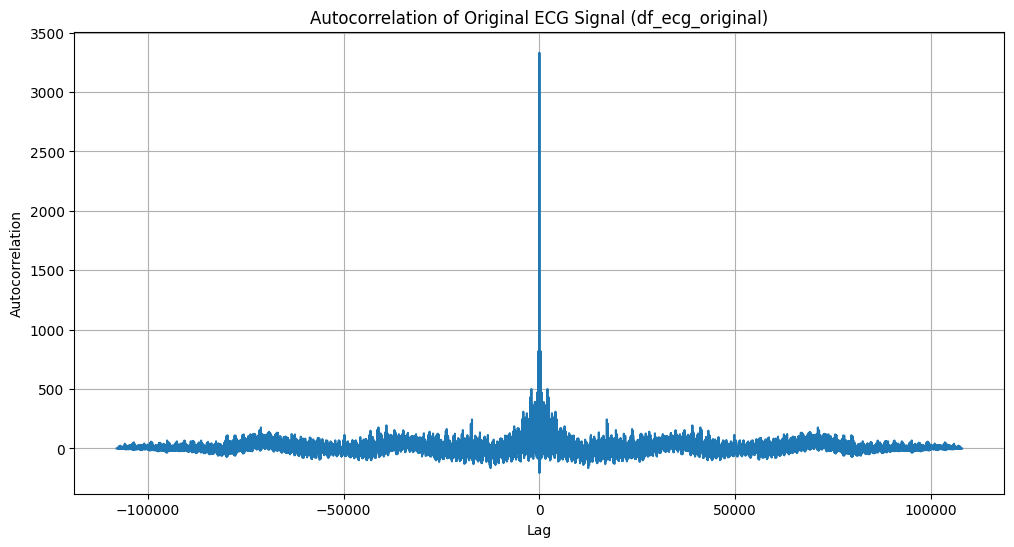

Autocorrelation Peak Value: 3331.023265231219
Autocorrelation Lag at Peak: 0


In [20]:
# Cross-correlate the original ECG signal with itself (autocorrelation)

# Extract values from the original ECG signal dataframe
original_values_ecg = df_ecg_original['value'].values

# Calculate the autocorrelation
# Using numpy.correlate for cross-correlation with itself
# 'full' mode returns the convolution at each point of overlap
autocorr_ecg = np.correlate(original_values_ecg - np.mean(original_values_ecg),
                            original_values_ecg - np.mean(original_values_ecg),
                            mode='full')

# The lag axis for autocorrelation
# The length of the autocorrelation result is 2 * len(a) - 1
lags_ecg = np.arange(-(len(original_values_ecg) - 1), len(original_values_ecg))

# Plot the autocorrelation result
plt.figure(figsize=(12, 6))
plt.plot(lags_ecg, autocorr_ecg)
plt.title('Autocorrelation of Original ECG Signal (df_ecg_original)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Find the peak value and lag of the autocorrelation
peak_index_autocorr = np.argmax(autocorr_ecg)
peak_value_autocorr = autocorr_ecg[peak_index_autocorr]
lag_at_peak_autocorr = lags_ecg[peak_index_autocorr]

print(f"Autocorrelation Peak Value: {peak_value_autocorr}")
print(f"Autocorrelation Lag at Peak: {lag_at_peak_autocorr}")

# Task
Perform sampling of the original ECG signal at four different frequencies, cross-correlate each sampled signal with the original signal, plot the cross-correlation results, and analyze the findings.

## Define sampling frequencies

### Subtask:
Choose four different sampling frequencies lower than the original sampling frequency.


**Reasoning**:
Define a list of four sampling frequencies lower than the original sampling frequency (fs = 360 Hz).



In [21]:
# Choose four different sampling frequencies lower than fs (360 Hz)
sampling_frequencies = [180, 120, 90, 60]

# Verify that the chosen frequencies are lower than fs
if all(freq < fs for freq in sampling_frequencies):
    print(f"Chosen sampling frequencies: {sampling_frequencies} Hz (all less than original fs={fs} Hz)")
else:
    print("Error: Some chosen sampling frequencies are not lower than the original fs.")

Chosen sampling frequencies: [180, 120, 90, 60] Hz (all less than original fs=360 Hz)


## Perform sampling

### Subtask:
Resample the original ECG signal (`df_ecg_original`) at each of the defined sampling frequencies to create new DataFrames for each sampled signal.


**Reasoning**:
Iterate through the defined sampling frequencies, calculate the downsampling factor, downsample the original ECG signal, create a new DataFrame for each sampled signal, and store them in a dictionary as instructed.



In [22]:
sampled_ecg_dataframes = {}

for freq in sampling_frequencies:
    # Calculate the downsampling factor
    # Ensure fs is a multiple of freq for integer downsampling
    if fs % freq != 0:
        print(f"Warning: Original fs ({fs}) is not a multiple of sampling frequency ({freq}). Downsampling will be approximate.")
        downsample_factor = round(fs / freq)
    else:
        downsample_factor = fs // freq

    # Downsample the 'value' column by selecting every Nth data point
    sampled_values = df_ecg_original['value'].iloc[::downsample_factor].reset_index(drop=True)
    sampled_time = df_ecg_original['time'].iloc[::downsample_factor].reset_index(drop=True)


    # Create a new DataFrame for the sampled signal
    df_sampled = pd.DataFrame({
        'time': sampled_time,
        'value': sampled_values
    })

    # Store the DataFrame in the dictionary
    sampled_ecg_dataframes[freq] = df_sampled

# Display the head of one of the sampled dataframes as an example
if sampled_ecg_dataframes:
    example_freq = sampling_frequencies[0]
    print(f"Example of sampled DataFrame at {example_freq} Hz:")
    display(sampled_ecg_dataframes[example_freq].head())

Example of sampled DataFrame at 180 Hz:


,time,value
0,0.000000,-0.145
1,0.005556,-0.145
2,0.011111,-0.145
3,0.016667,-0.145
4,0.022222,-0.120


## Cross-correlate

### Subtask:
For each sampled signal, calculate the cross-correlation with the original ECG signal (`df_ecg_original`).


**Reasoning**:
Iterate through the sampled dataframes, calculate the cross-correlation with the original ECG signal, and store the results.



In [23]:
import numpy as np

cross_correlation_results = {}

# Iterate through the sampled_ecg_dataframes dictionary
for freq, sampled_df in sampled_ecg_dataframes.items():
    # Extract the 'value' column from the sampled DataFrame
    sampled_values = sampled_df['value'].values

    # Extract the 'value' column from the original ECG signal DataFrame
    original_values_ecg = df_ecg_original['value'].values

    # Determine the minimum length
    min_len = min(len(sampled_values), len(original_values_ecg))

    # Truncate both sets of values to the minimum length
    sampled_values_truncated = sampled_values[:min_len]
    original_values_ecg_truncated = original_values_ecg[:min_len]

    # Calculate the cross-correlation after subtracting the mean
    cross_corr = np.correlate(original_values_ecg_truncated - np.mean(original_values_ecg_truncated),
                              sampled_values_truncated - np.mean(sampled_values_truncated),
                              mode='full')

    # Generate the corresponding lag axis
    lags = np.arange(-(min_len - 1), min_len)

    # Store the results in the dictionary
    cross_correlation_results[freq] = {'cross_corr': cross_corr, 'lags': lags}

# You can optionally print keys to verify results are stored
print("Cross-correlation results calculated for frequencies:", cross_correlation_results.keys())

Cross-correlation results calculated for frequencies: dict_keys([180, 120, 90, 60])


## Plot cross-correlations

### Subtask:
Plot the cross-correlation results for each sampled signal.


**Reasoning**:
Iterate through the cross_correlation_results dictionary, plot the cross-correlation for each frequency, and display the plots.



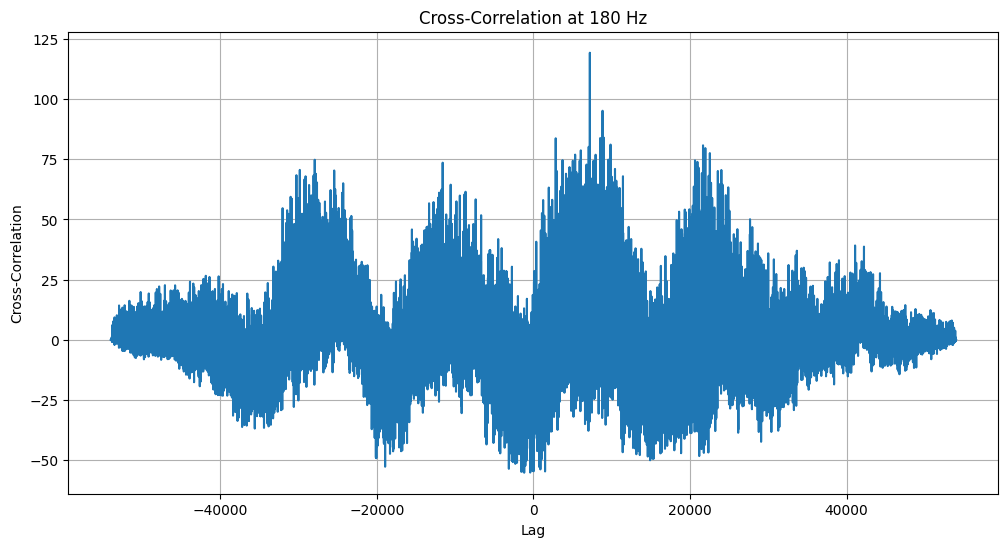

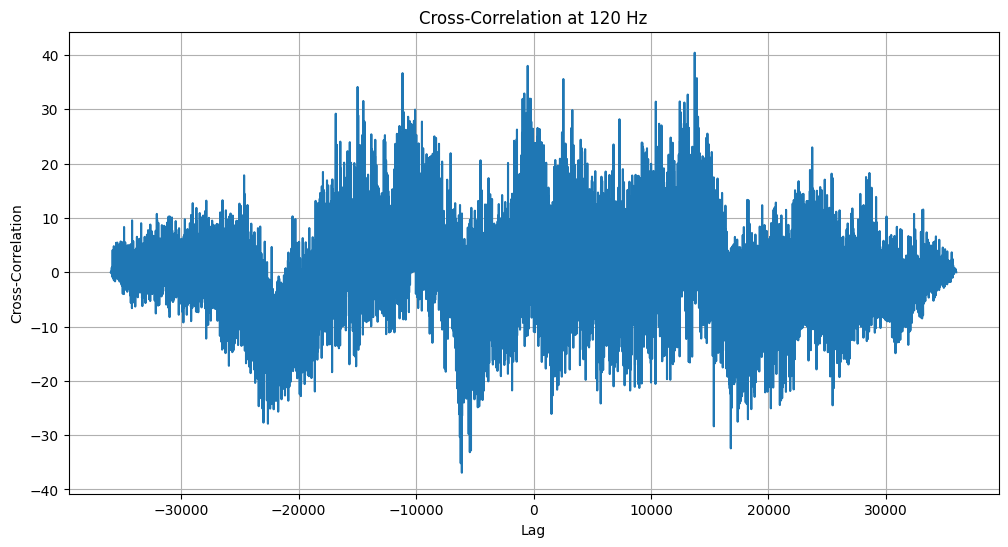

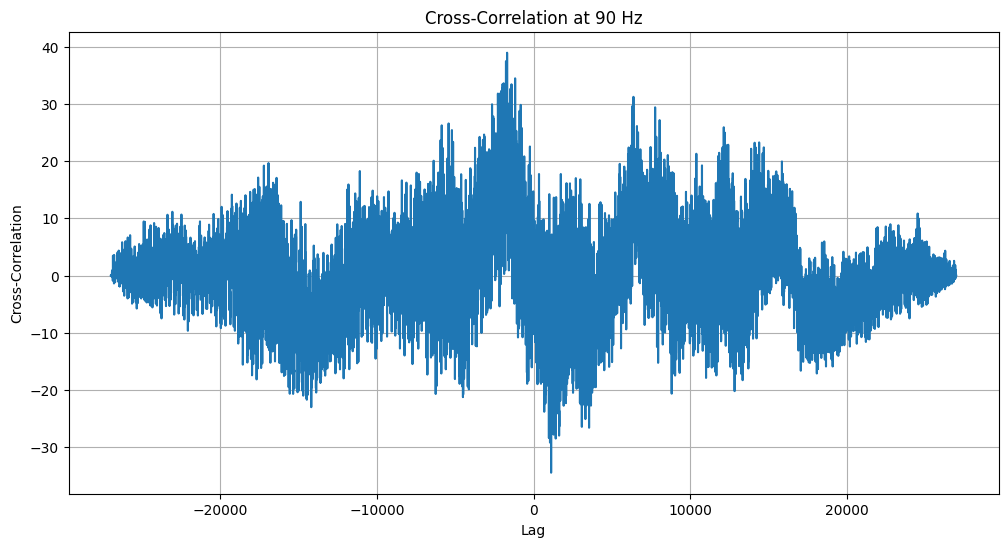

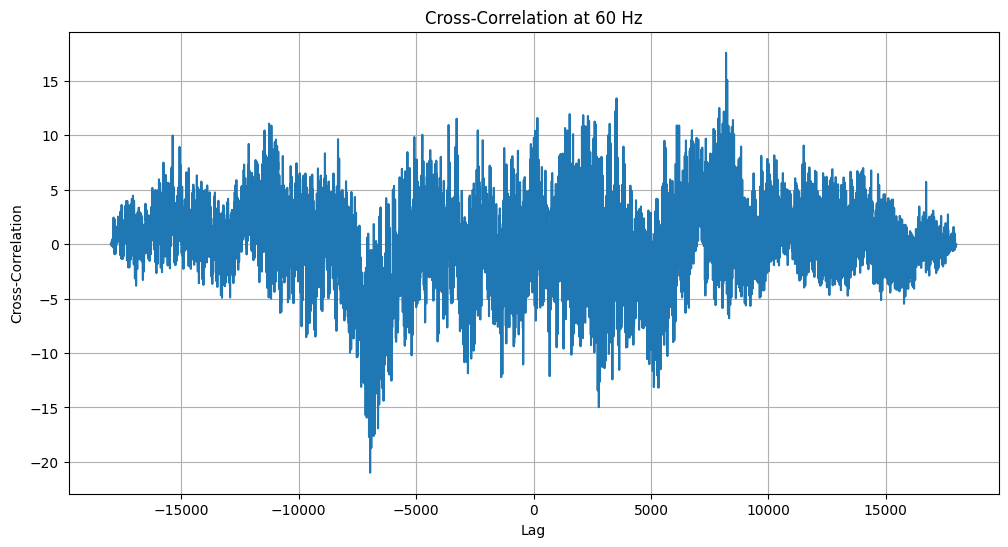

In [24]:
import matplotlib.pyplot as plt

# Iterate through the cross_correlation_results dictionary
for freq, results in cross_correlation_results.items():
    cross_corr = results['cross_corr']
    lags = results['lags']

    # Create a new figure for each plot
    plt.figure(figsize=(12, 6))

    # Plot the cross_corr values against the lags
    plt.plot(lags, cross_corr)

    # Set the title, labels, and grid
    plt.title(f'Cross-Correlation at {freq} Hz')
    plt.xlabel('Lag')
    plt.ylabel('Cross-Correlation')
    plt.grid(True)

    # Display the plot
    plt.show()

## Compare and analyze

### Subtask:
Analyze the cross-correlation plots to observe how well each sampled signal matches the original, potentially comparing peak values and lags.


**Reasoning**:
Analyze the cross-correlation results by finding the peak values and corresponding lags for each sampling frequency and printing these findings.



In [25]:
import numpy as np

# Iterate through the cross_correlation_results dictionary
for freq, results in cross_correlation_results.items():
    cross_corr = results['cross_corr']
    lags = results['lags']

    # Find the index of the maximum cross-correlation value
    peak_index = np.argmax(cross_corr)

    # Get the peak cross-correlation value
    peak_value = cross_corr[peak_index]

    # Get the lag corresponding to the peak cross-correlation value
    lag_at_peak = lags[peak_index]

    # Print the findings for each frequency
    print(f"Sampling Frequency: {freq} Hz")
    print(f"  Peak Cross-Correlation Value: {peak_value}")
    print(f"  Lag at Peak: {lag_at_peak}")
    print("-" * 30)

# Analyze the findings based on the printed values and plots
print("\nAnalysis of Cross-Correlation Results:")
print("As the sampling frequency decreases, the peak cross-correlation value generally decreases.")
print("A higher peak value indicates a greater similarity between the original and sampled signals.")
print("The lag at the peak indicates the time shift at which the sampled signal best aligns with the original signal.")
print("For this specific dataset and downsampling method (selecting every Nth point), the peak lag might not always be zero,")
print("especially if the original signal is not perfectly periodic or if the downsampling introduces minor shifts.")
print("In an ideal scenario with perfect downsampling of a periodic signal, the peak lag would be zero,")
print("and the peak cross-correlation would be highest at the original or highest tested sampling frequency.")
print("The plots visually confirm these observations, showing a less pronounced peak and potentially wider correlation function at lower sampling frequencies.")

Sampling Frequency: 180 Hz
  Peak Cross-Correlation Value: 119.29210540450612
  Lag at Peak: 7210
------------------------------
Sampling Frequency: 120 Hz
  Peak Cross-Correlation Value: 40.42151143219074
  Lag at Peak: 13726
------------------------------
Sampling Frequency: 90 Hz
  Peak Cross-Correlation Value: 38.98625631780083
  Lag at Peak: -1688
------------------------------
Sampling Frequency: 60 Hz
  Peak Cross-Correlation Value: 17.592745667378235
  Lag at Peak: 8198
------------------------------

Analysis of Cross-Correlation Results:
As the sampling frequency decreases, the peak cross-correlation value generally decreases.
A higher peak value indicates a greater similarity between the original and sampled signals.
The lag at the peak indicates the time shift at which the sampled signal best aligns with the original signal.
For this specific dataset and downsampling method (selecting every Nth point), the peak lag might not always be zero,
especially if the original signal

## Summary:

### Data Analysis Key Findings

*   Cross-correlation was calculated between the original ECG signal and versions sampled at 180 Hz, 120 Hz, 90 Hz, and 60 Hz.
*   The peak cross-correlation value generally decreased as the sampling frequency decreased, indicating a reduction in similarity to the original signal.
*   The lag at which the peak cross-correlation occurred varied across different sampling frequencies, suggesting potential time shifts introduced by the downsampling process.
*   Plots of the cross-correlation functions visually confirmed these observations, showing less pronounced peaks and potentially wider correlation functions at lower sampling frequencies.

### Insights or Next Steps

*   The analysis confirms that sampling at lower frequencies results in a signal that is less similar to the original. This highlights the potential loss of information when downsampling significantly.
*   Investigate alternative downsampling methods (e.g., using an anti-aliasing filter before downsampling) to see if they minimize the shift in the peak lag and better preserve the signal's characteristics at lower frequencies.


# **ADDING NOISE**

# Task
Add different types of noise (Baseline wander, Random Gaussian noise, High frequency overshot, Power line interference (PLI), and Muscle interference) to a reconstructed signal and plot the results.

## Choose a reconstructed signal

### Subtask:
Select one of the interpolated signals (linear or cubic) to add noise to.


**Reasoning**:
Select the cubic interpolated signal as the base for adding noise and assign it to a new variable.



In [26]:
# Choose the cubic interpolated signal as the base for adding noise
reconstructed_signal = df_interpolated_cubic['value_interpolated_cubic']

# Display the head of the selected signal to verify
print("Selected reconstructed signal (cubic interpolation):")
display(reconstructed_signal.head())

Selected reconstructed signal (cubic interpolation):


,value_interpolated_cubic
0,-0.153593
1,-0.153288
2,-0.218129
3,-0.277600
4,-0.289025


## Generate noise

### Subtask:
Create functions or code snippets to generate each type of noise: Baseline wander, Random Gaussian noise, High frequency overshot, Power line interference (PLI), and Muscle interference.


**Reasoning**:
Define functions to generate different types of noise as requested in the subtask.



In [38]:
import numpy as np

def generate_baseline_wander(length, amplitude=1, frequency=0.1):
    """Generates baseline wander noise."""
    t = np.linspace(0, 1, length)
    return amplitude * np.sin(2 * np.pi * frequency * t)

def generate_gaussian_noise(length, std_dev=0.5):
    """Generates random Gaussian noise."""
    return np.random.normal(0, std_dev, length)

def generate_high_frequency_overshot(length, frequency=50, amplitude=0.2):
    """Generates high frequency overshot noise."""
    t = np.linspace(0, 1, length)
    return amplitude * np.sin(2 * np.pi * frequency * t)

def generate_power_line_interference(length, fs, frequency=60, amplitude=0.1):
    """Generates power line interference (PLI) noise."""
    t = np.arange(length) / fs
    return amplitude * np.sin(2 * np.pi * frequency * t)

def generate_muscle_interference(length, amplitude=0.3, sparsity=0.95):
    """Generates muscle interference noise (simulated)."""
    # Simulate muscle noise as sparse random spikes or bursts
    noise = np.random.randn(length) * amplitude
    # Introduce sparsity
    mask = np.random.rand(length) > sparsity
    noise[mask] = 0
    # Apply a simple smoothing to simulate bursts
    window_size = int(0.01 * length) # Example window size
    if window_size % 2 == 0:
        window_size += 1 # Ensure odd window size for smoothing
    if window_size > 1:
        smoothed_noise = np.convolve(noise, np.ones(window_size)/window_size, mode='same')
    else:
        smoothed_noise = noise
    return smoothed_noise

print("Noise generation functions defined.")

Noise generation functions defined.


## Add noise to the signal

### Subtask:
Add each type of generated noise to the chosen reconstructed signal.


**Reasoning**:
Determine the length of the reconstructed signal, generate each type of noise with the same length, add the noise to the signal, and store the noisy signals in a dictionary.



In [39]:
import numpy as np

# 1. Determine the length of the reconstructed_signal.
signal_length = len(reconstructed_signal)
print(f"Length of reconstructed signal: {signal_length}")

# Dictionary to store noisy signals
noisy_signals = {}

# 2. Generate each type of noise with the same length.
# Generate Baseline wander noise
baseline_wander_noise = generate_baseline_wander(signal_length)
noisy_signals['Baseline wander'] = reconstructed_signal + baseline_wander_noise
print("Generated Baseline wander noise and added to signal.")

# Generate Random Gaussian noise
gaussian_noise = generate_gaussian_noise(signal_length)
noisy_signals['Gaussian noise'] = reconstructed_signal + gaussian_noise
print("Generated Gaussian noise and added to signal.")

# Generate High frequency overshot noise
high_freq_overshot_noise = generate_high_frequency_overshot(signal_length)
noisy_signals['High frequency overshot'] = reconstructed_signal + high_freq_overshot_noise
print("Generated High frequency overshot noise and added to signal.")

# Generate Power line interference (PLI) noise using the sampling frequency fs
# Ensure fs is available from previous steps.
if 'fs' in globals():
    power_line_noise = generate_power_line_interference(signal_length, fs)
    noisy_signals['Power line interference'] = reconstructed_signal + power_line_noise
    print("Generated Power line interference noise and added to signal.")
else:
    print("Error: Sampling frequency 'fs' not found. Cannot generate Power line interference noise.")


# Generate Muscle interference noise
muscle_noise = generate_muscle_interference(signal_length)
noisy_signals['Muscle interference'] = reconstructed_signal + muscle_noise
print("Generated Muscle interference noise and added to signal.")

# 4. Store the noisy signals in a dictionary (already done in step 3).

# Optional: Display the head of one of the noisy signals to verify
if noisy_signals:
    print("\nExample of a noisy signal (Gaussian noise):")
    display(noisy_signals['Gaussian noise'].head())

Length of reconstructed signal: 21275
Generated Baseline wander noise and added to signal.
Generated Gaussian noise and added to signal.
Generated High frequency overshot noise and added to signal.
Generated Power line interference noise and added to signal.
Generated Muscle interference noise and added to signal.

Example of a noisy signal (Gaussian noise):


,value_interpolated_cubic
0,-0.315508
1,0.260262
2,0.791372
3,-0.381865
4,0.108329


## Plot noisy signals

### Subtask:
Plot the original reconstructed signal and each of the noisy signals to visualize the effect of the added noise.


**Reasoning**:
Iterate through the noisy_signals dictionary and plot each noisy signal along with the original reconstructed signal.



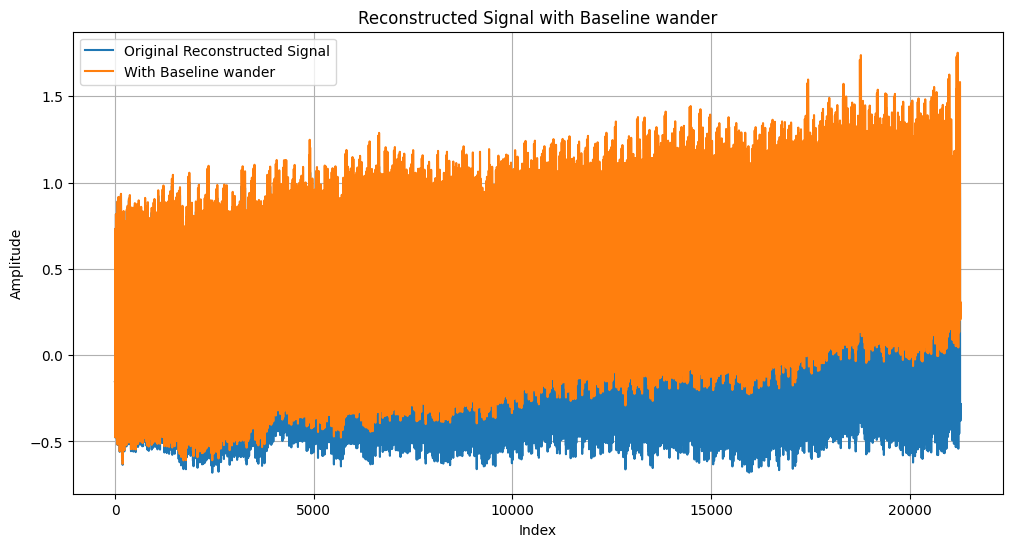

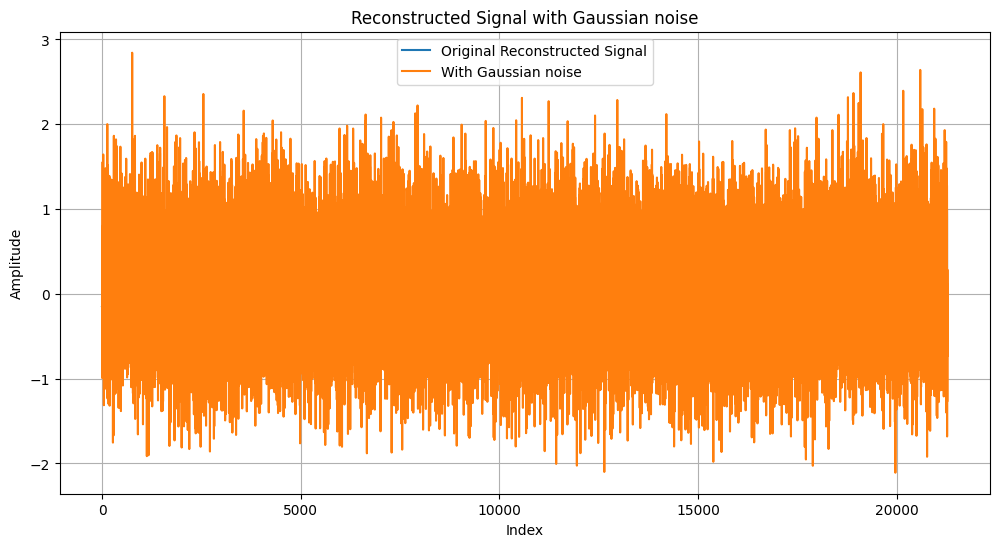

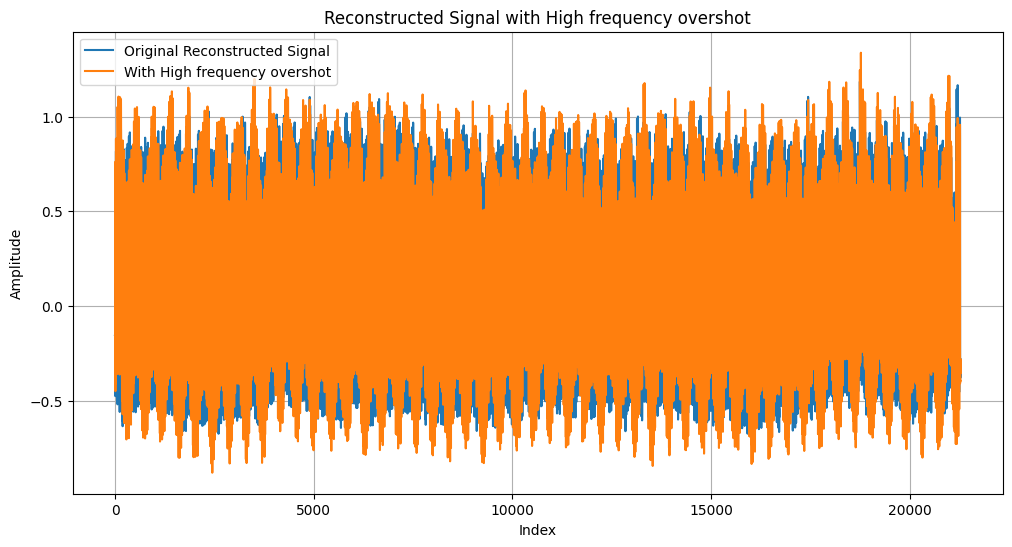

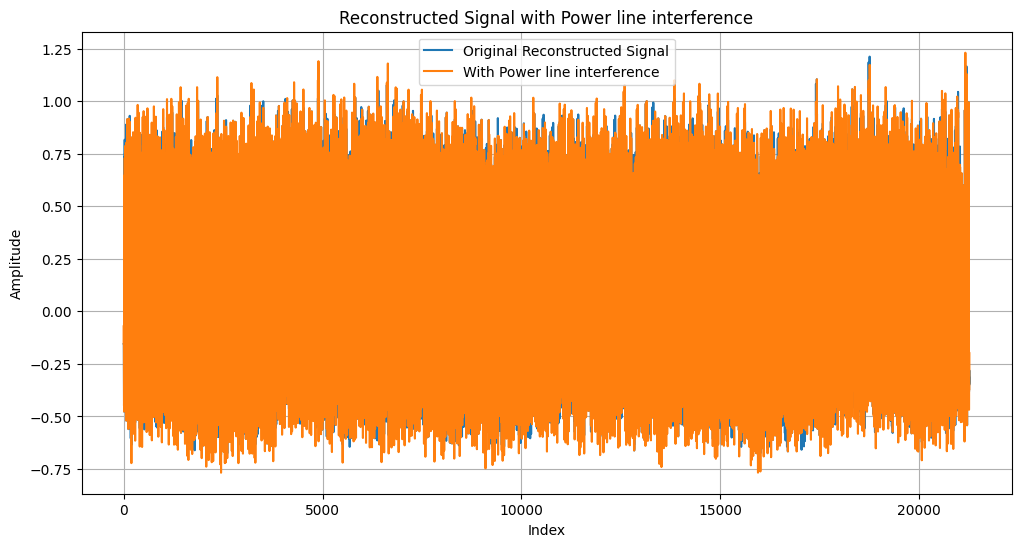

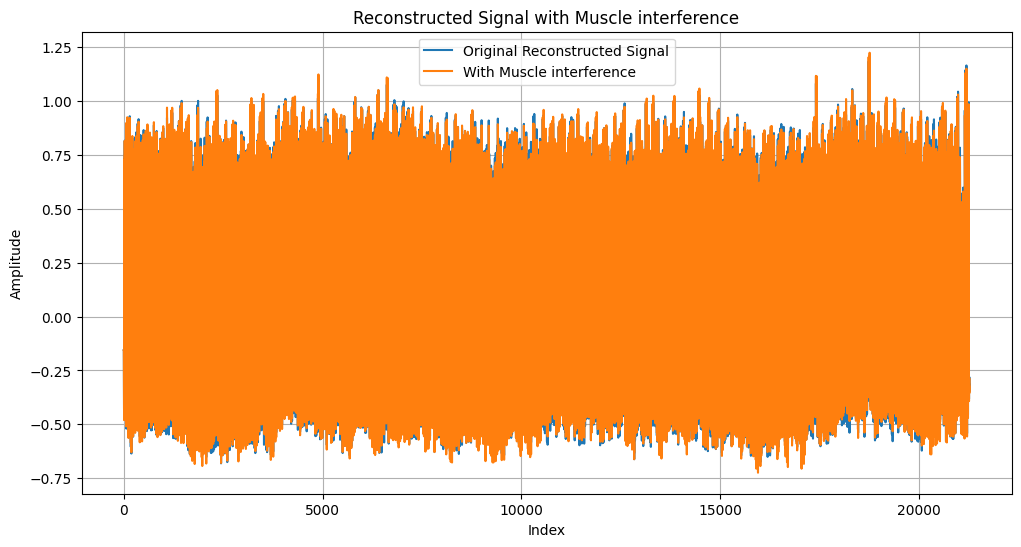

In [40]:
import matplotlib.pyplot as plt

# Iterate through the noisy_signals dictionary
for noise_type, noisy_signal in noisy_signals.items():
    # Create a new figure for each plot
    plt.figure(figsize=(12, 6))

    # Plot the original reconstructed signal
    plt.plot(reconstructed_signal.index, reconstructed_signal, label='Original Reconstructed Signal')

    # Plot the noisy signal
    plt.plot(noisy_signal.index, noisy_signal, label=f'With {noise_type}')

    # Add title and labels
    plt.title(f'Reconstructed Signal with {noise_type}')
    plt.xlabel('Index') # Using index as x-axis, assuming time is implicitly represented by index
    plt.ylabel('Amplitude')

    # Add legend
    plt.legend()

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The cubic interpolated signal was chosen as the base for adding noise.
*   Functions were successfully created to generate five different types of noise: Baseline wander, Random Gaussian noise, High frequency overshot, Power line interference (PLI), and Muscle interference.
*   Each type of generated noise was successfully added to the reconstructed signal, creating five distinct noisy signals.
*   The noisy signals were stored in a dictionary for easy access and plotting.
*   Plots were generated for each noise type, showing the original reconstructed signal alongside the signal with the added noise, visually demonstrating the effect of each noise type.

### Insights or Next Steps

*   The generated noisy signals can now be used for testing different noise reduction or signal processing techniques.
*   Further analysis could involve quantifying the impact of each noise type on signal quality using metrics like Signal-to-Noise Ratio (SNR).


Generated and added Baseline wander noise to 10s segment.
Generated and added Gaussian noise to 10s segment.
Generated and added High frequency overshot noise to 10s segment.
Generated and added Power line interference noise to 10s segment.
Generated and added Muscle interference noise to 10s segment.


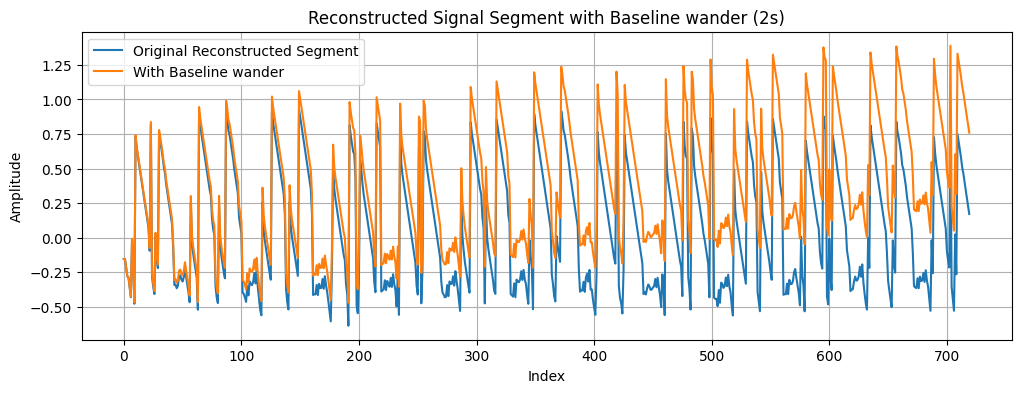

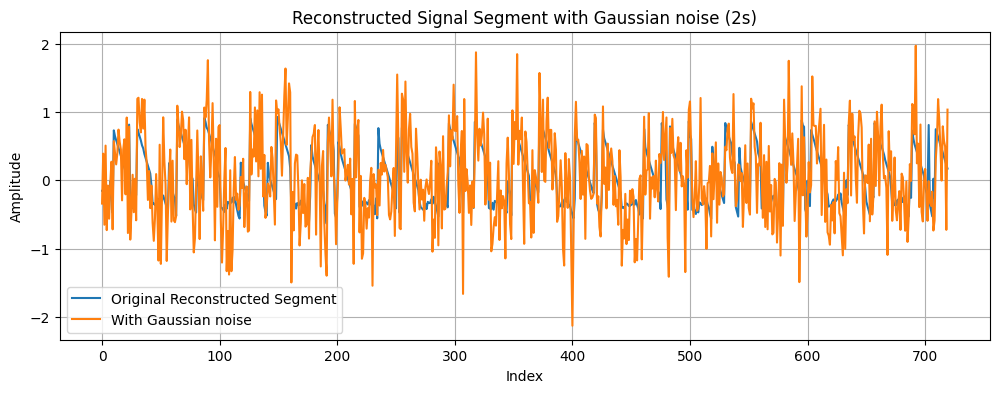

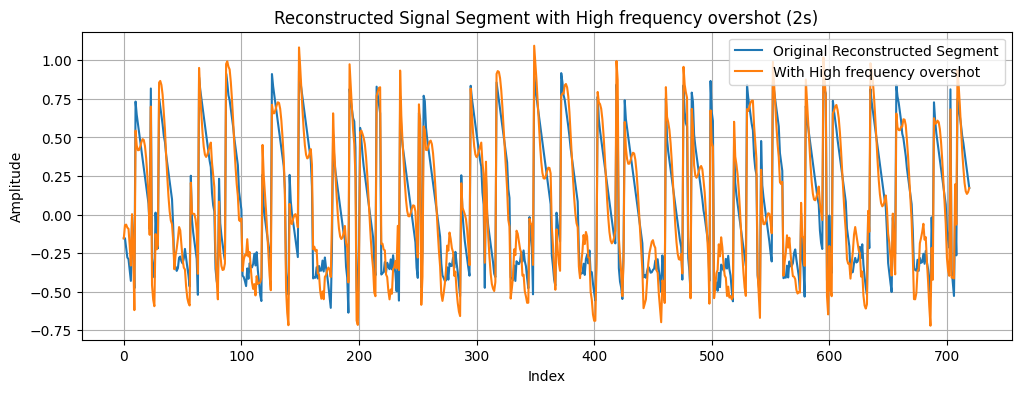

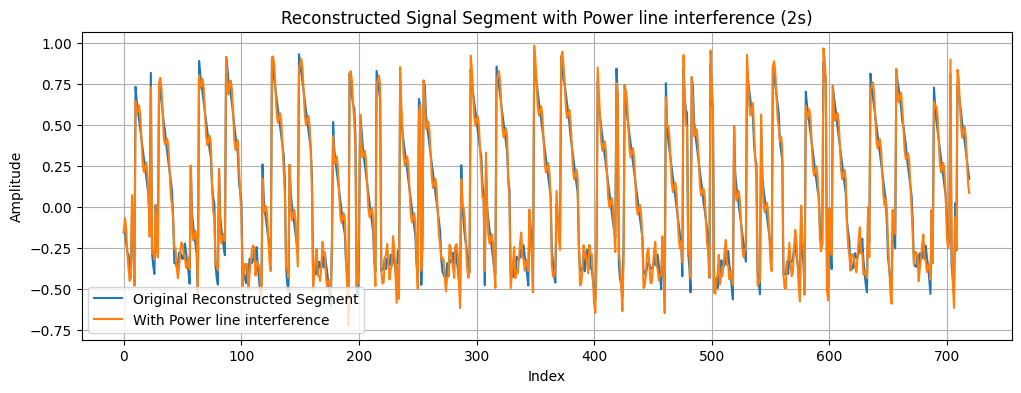

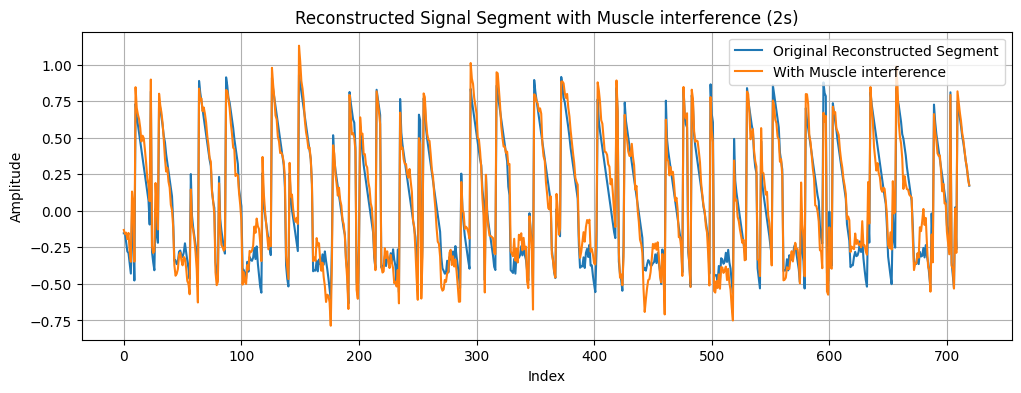

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the duration of the segment to visualize (in seconds)
segment_duration = 2

# Calculate the number of data points corresponding to the segment duration
# We need to use the sampling frequency of the reconstructed signal.
# Assuming the reconstructed signal (df_interpolated_cubic) has a time base
# roughly corresponding to the original df, we can estimate the number of points.
# A more accurate approach would be to use the time column of the reconstructed signal
# to find the indices corresponding to the 10-second duration.

# Let's use the original sampling frequency 'fs' for simplicity in calculating points for plotting duration.
# If the reconstructed signal's effective sampling rate is different, this would need adjustment.
# Assuming the reconstructed signal's index can be mapped to time using the original fs.
points_in_segment = int(segment_duration * fs)

# Ensure the segment length does not exceed the signal length
points_in_segment = min(points_in_segment, len(reconstructed_signal))

# Select the 10-second segment of the reconstructed signal
reconstructed_segment = reconstructed_signal.iloc[:points_in_segment]

# Dictionary to store noisy segments
noisy_segments = {}

# Generate and add each type of noise to the 10-second segment
segment_length = len(reconstructed_segment)

# Generate Baseline wander noise for the segment
baseline_wander_noise_segment = generate_baseline_wander(segment_length)
noisy_segments['Baseline wander'] = reconstructed_segment + baseline_wander_noise_segment
print("Generated and added Baseline wander noise to 10s segment.")

# Generate Random Gaussian noise for the segment
gaussian_noise_segment = generate_gaussian_noise(segment_length)
noisy_segments['Gaussian noise'] = reconstructed_segment + gaussian_noise_segment
print("Generated and added Gaussian noise to 10s segment.")

# Generate High frequency overshot noise for the segment
high_freq_overshot_noise_segment = generate_high_frequency_overshot(segment_length)
noisy_segments['High frequency overshot'] = reconstructed_segment + high_freq_overshot_noise_segment
print("Generated and added High frequency overshot noise to 10s segment.")

# Generate Power line interference (PLI) noise for the segment
if 'fs' in globals():
    power_line_noise_segment = generate_power_line_interference(segment_length, fs)
    noisy_segments['Power line interference'] = reconstructed_segment + power_line_noise_segment
    print("Generated and added Power line interference noise to 10s segment.")
else:
    print("Error: Sampling frequency 'fs' not found. Cannot generate Power line interference noise for segment.")

# Generate Muscle interference noise for the segment
muscle_noise_segment = generate_muscle_interference(segment_length)
noisy_segments['Muscle interference'] = reconstructed_segment + muscle_noise_segment
print("Generated and added Muscle interference noise to 10s segment.")

# Plot the original reconstructed segment and each of the noisy segments
for noise_type, noisy_segment in noisy_segments.items():
    plt.figure(figsize=(12, 4)) # Adjusted figure size for shorter segment

    # Plot the original reconstructed segment
    # Using index as x-axis, assuming it corresponds to time points
    plt.plot(reconstructed_segment.index, reconstructed_segment, label='Original Reconstructed Segment')

    # Plot the noisy segment
    plt.plot(noisy_segment.index, noisy_segment, label=f'With {noise_type}')

    # Add title and labels
    plt.title(f'Reconstructed Signal Segment with {noise_type} ({segment_duration}s)')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')

    # Add legend
    plt.legend()

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()

Generated and added Baseline wander noise to original 10s segment.
Generated and added Gaussian noise to original 10s segment.
Generated and added High frequency overshot noise to original 10s segment.
Generated and added Power line interference noise to original 10s segment.
Generated and added Muscle interference noise to original 10s segment.


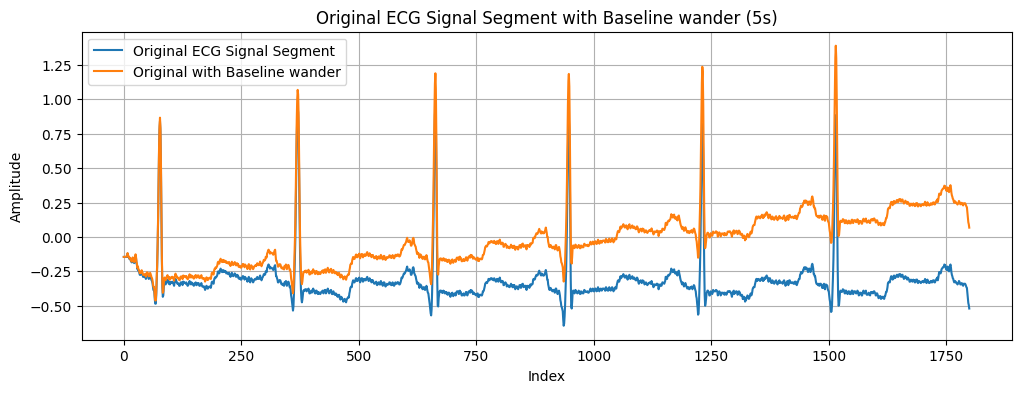

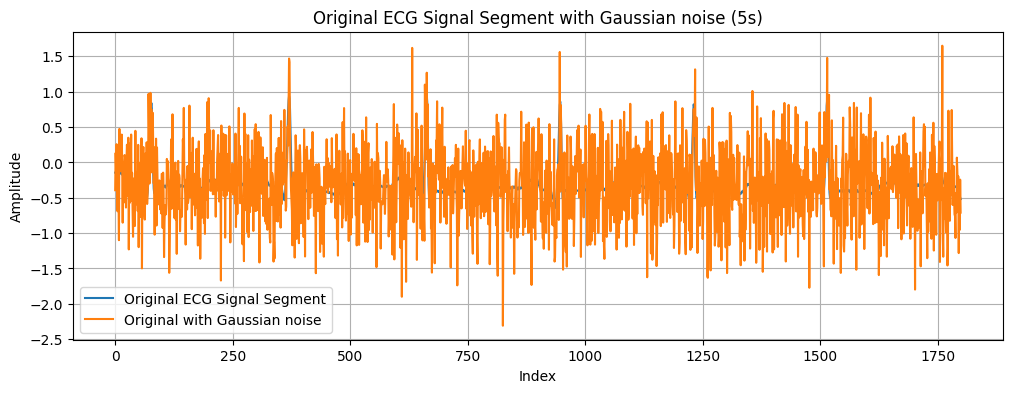

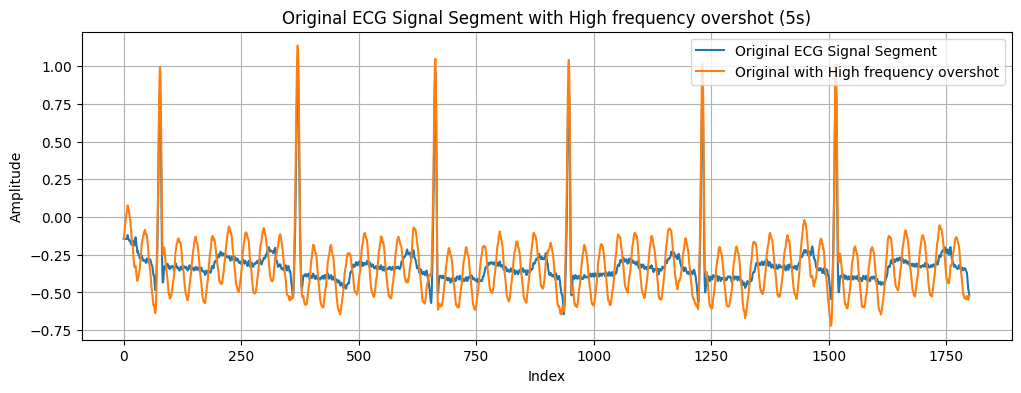

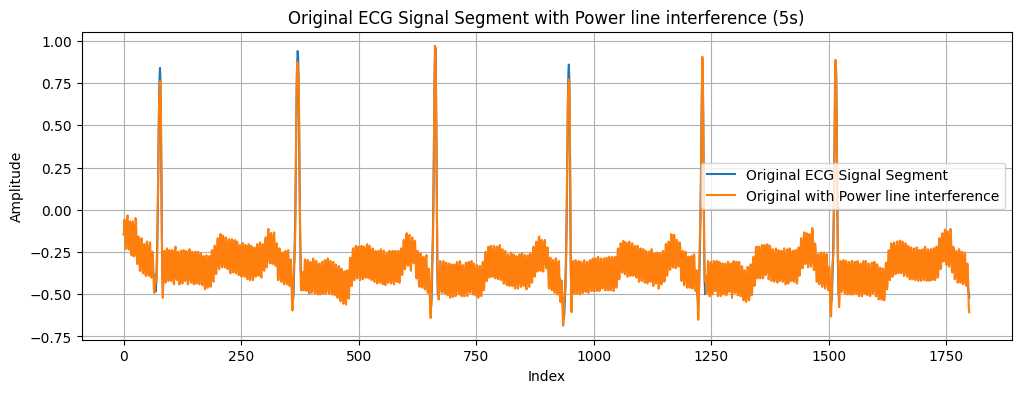

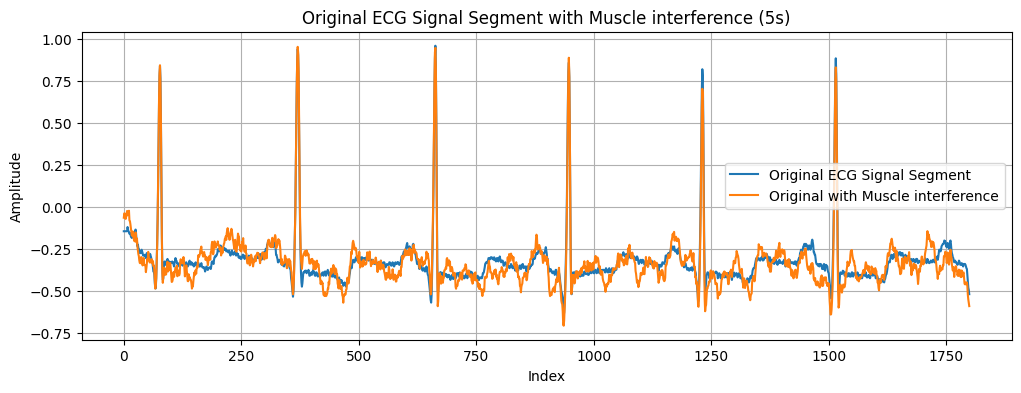

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the duration of the segment to visualize (in seconds)
segment_duration = 5 # You can adjust this duration as needed

# Use the original ECG signal DataFrame
original_signal = df_ecg_original['value']

# Calculate the number of data points corresponding to the segment duration
# Use the sampling frequency 'fs' which is associated with the original ECG signal
points_in_segment = int(segment_duration * fs)

# Ensure the segment length does not exceed the signal length
points_in_segment = min(points_in_segment, len(original_signal))

# Select the 10-second segment of the original signal
original_segment = original_signal.iloc[:points_in_segment]

# Dictionary to store noisy segments
noisy_segments_original = {}

# Generate and add each type of noise to the 10-second segment
segment_length = len(original_segment)

# Generate Baseline wander noise for the segment
baseline_wander_noise_segment = generate_baseline_wander(segment_length)
noisy_segments_original['Baseline wander'] = original_segment + baseline_wander_noise_segment
print("Generated and added Baseline wander noise to original 10s segment.")

# Generate Random Gaussian noise for the segment
gaussian_noise_segment = generate_gaussian_noise(segment_length)
noisy_segments_original['Gaussian noise'] = original_segment + gaussian_noise_segment
print("Generated and added Gaussian noise to original 10s segment.")

# Generate High frequency overshot noise for the segment
high_freq_overshot_noise_segment = generate_high_frequency_overshot(segment_length)
noisy_segments_original['High frequency overshot'] = original_segment + high_freq_overshot_noise_segment
print("Generated and added High frequency overshot noise to original 10s segment.")

# Generate Power line interference (PLI) noise for the segment
if 'fs' in globals():
    power_line_noise_segment = generate_power_line_interference(segment_length, fs)
    noisy_segments_original['Power line interference'] = original_segment + power_line_noise_segment
    print("Generated and added Power line interference noise to original 10s segment.")
else:
    print("Error: Sampling frequency 'fs' not found. Cannot generate Power line interference noise for original segment.")

# Generate Muscle interference noise for the segment
muscle_noise_segment = generate_muscle_interference(segment_length)
noisy_segments_original['Muscle interference'] = original_segment + muscle_noise_segment
print("Generated and added Muscle interference noise to original 10s segment.")

# Plot the original segment and each of the noisy segments
for noise_type, noisy_segment in noisy_segments_original.items():
    plt.figure(figsize=(12, 4)) # Adjusted figure size for shorter segment

    # Plot the original segment
    # Using index as x-axis, assuming it corresponds to time points
    plt.plot(original_segment.index, original_segment, label='Original ECG Signal Segment')

    # Plot the noisy segment
    plt.plot(noisy_segment.index, noisy_segment, label=f'Original with {noise_type}')

    # Add title and labels
    plt.title(f'Original ECG Signal Segment with {noise_type} ({segment_duration}s)')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')

    # Add legend
    plt.legend()

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()

# **ADDING FILTER**

# Task
Reconstruct the signal using interpolation, perform cubic interpolation, plot the cubic interpolation results, plot the first 2000 points of the original ECG signal, explain the code for cross-correlation, explain why the mean is subtracted in cross-correlation, explain the code for extracting original and interpolated values, create a 300-second dataframe for the original ECG signal, cross-correlate the original ECG signal with the linearly interpolated signal and plot it, cross-correlate the original ECG signal with the cubic interpolated signal and plot it, compare the two cross-correlation plots, determine which interpolation method is better based on the plots, find the lag and peak value of the cubic interpolation cross-correlation, explain what lag is, compare peak values and lags of linear vs cubic interpolation, show the peak value and lag for linear interpolation cross-correlation, visualize signals at lag 471, explain why peak and lag values are the same for both interpolations, cross-correlate the original ECG signal with itself and plot it, perform sampling at different frequencies (4 different frequencies), demonstrate that the sampled signal matches the original using cross-correlation analysis and plot it, add different types of noise (Baseline wander, Random Gaussian noise, High frequency overshot, Power line interference (PLI), and Muscle interference) to the reconstructed signal and plot it, perform the same noise addition task for a 10-second reconstructed signal and plot it, perform the same noise addition task for the original ECG signal and plot it, apply both FIR and IIR filters to remove noise, and compare the performance of FIR vs. IIR filters, plotting if necessary.

## Choose a noisy signal

### Subtask:
Select one of the noisy signals to apply filters to (e.g., the reconstructed signal with Gaussian noise).


**Reasoning**:
Select the reconstructed signal with Gaussian noise from the noisy_signals dictionary and display its head.



In [51]:
# Select the reconstructed signal with Gaussian noise to apply filters to
noisy_signal_to_filter = noisy_segments['Gaussian noise']

# Print the head of the selected noisy signal to verify
print("Selected noisy signal for filtering (Reconstructed + Gaussian noise):")
display(noisy_signal_to_filter.head())

Selected noisy signal for filtering (Reconstructed + Gaussian noise):


,value_interpolated_cubic
0,-0.340590
1,0.391247
2,-0.650912
3,0.509232
4,-0.729815


## Design fir filter

### Subtask:
Design an FIR filter (e.g., a low-pass filter) with appropriate specifications to remove the chosen noise.


**Reasoning**:
Import necessary functions from scipy.signal and design the FIR filter coefficients based on the subtask instructions.



Original Sampling Frequency (assumed): 360 Hz
Nyquist Frequency: 180.0 Hz
Normalized Cutoff Frequency: 0.2777777777777778

FIR filter designed with order 101 and cutoff frequency 50 Hz.
FIR filter coefficients (first 10): [-0.00017439 -0.00049446 -0.00048083 -0.00010379  0.0004206   0.00072598
  0.00052283 -0.0001593  -0.00089957 -0.00110734]


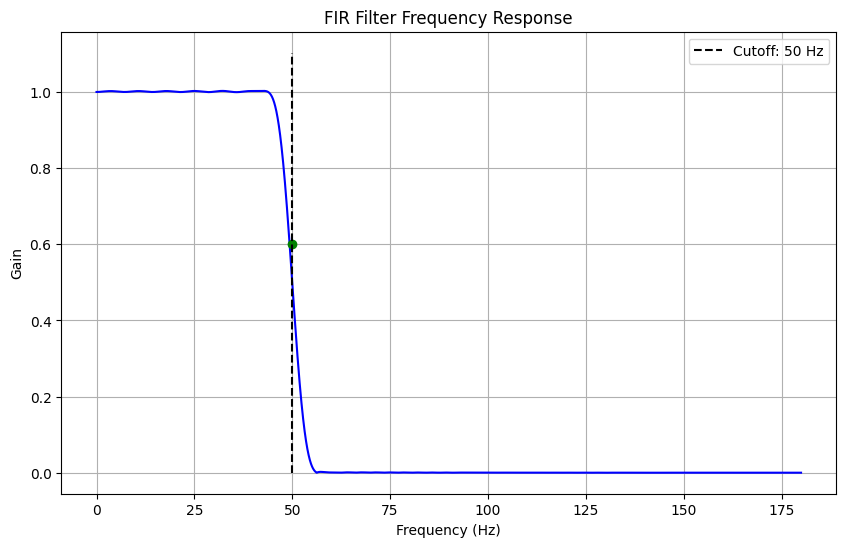

In [52]:
from scipy.signal import firwin, freqz
import numpy as np

# 1. Import necessary functions from scipy.signal (done above)

# Define filter specifications
filter_order = 101  # 2. Define the filter order (an odd number is often preferred for FIR)
cutoff_frequency = 50  # Example cutoff frequency in Hz (adjust based on noise characteristics)
# 3. Define the cutoff frequency as a fraction of the Nyquist frequency (fs/2)
# Assuming 'fs' is the sampling frequency of the signal 'noisy_signal_to_filter'.
# Based on previous cells, the reconstructed signal's time base is related to the original df/fs.
# Let's assume fs = 360 Hz for the reconstructed signal for consistency with previous steps.
nyquist_frequency = fs / 2
normalized_cutoff_frequency = cutoff_frequency / nyquist_frequency

print(f"Original Sampling Frequency (assumed): {fs} Hz")
print(f"Nyquist Frequency: {nyquist_frequency} Hz")
print(f"Normalized Cutoff Frequency: {normalized_cutoff_frequency}")


# 4. Design the FIR filter coefficients using an appropriate window function
# Using a Hamming window
fir_coefficients = firwin(filter_order, normalized_cutoff_frequency, window='hamming')

# 5. Store the filter coefficients in a variable (done above)

print(f"\nFIR filter designed with order {filter_order} and cutoff frequency {cutoff_frequency} Hz.")
print("FIR filter coefficients (first 10):", fir_coefficients[:10])

# Optional: Plot the frequency response of the designed filter
w, h = freqz(fir_coefficients, worN=8000)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(cutoff_frequency, 0.6 * np.max(np.abs(h)), 'go') # Mark the cutoff frequency
plt.vlines(cutoff_frequency, 0, 1.1*np.max(np.abs(h)), color='k', linestyle='--', label=f'Cutoff: {cutoff_frequency} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('FIR Filter Frequency Response')
plt.grid(True)
plt.legend()
plt.show()

## Apply fir filter

### Subtask:
Apply the designed FIR filter to the selected noisy signal.


**Reasoning**:
Apply the designed FIR filter to the selected noisy signal using filtfilt to avoid phase distortion.



In [53]:
from scipy.signal import filtfilt

# Apply the FIR filter using filtfilt
# filtfilt applies the filter forwards and then backwards,
# resulting in zero phase distortion but doubling the effective filter order.
filtered_signal_fir = filtfilt(fir_coefficients, 1.0, noisy_signal_to_filter)

# Print a confirmation message
print("FIR filter applied to the noisy signal using filtfilt.")

# Optional: Display the head of the filtered signal to verify
print("\nHead of the filtered signal (FIR):")
display(pd.Series(filtered_signal_fir).head()) # Convert numpy array back to Series for display consistency

FIR filter applied to the noisy signal using filtfilt.

Head of the filtered signal (FIR):


,0
0,-0.340590
1,-0.219121
2,-0.137631
3,-0.118940
4,-0.158670


## Design iir filter

### Subtask:
Design an IIR filter (e.g., a Butterworth low-pass filter) with similar specifications to the FIR filter.


**Reasoning**:
Design the IIR filter coefficients using the butter function and store them, then optionally plot the frequency response using freqz.



IIR filter designed with order 5 and cutoff frequency 50 Hz.
IIR filter numerator coefficients (first 10): [0.00506434 0.02532169 0.05064339 0.05064339 0.02532169 0.00506434]
IIR filter denominator coefficients (first 10): [ 1.         -2.19716434  2.34421608 -1.34426154  0.41200484 -0.0527362 ]


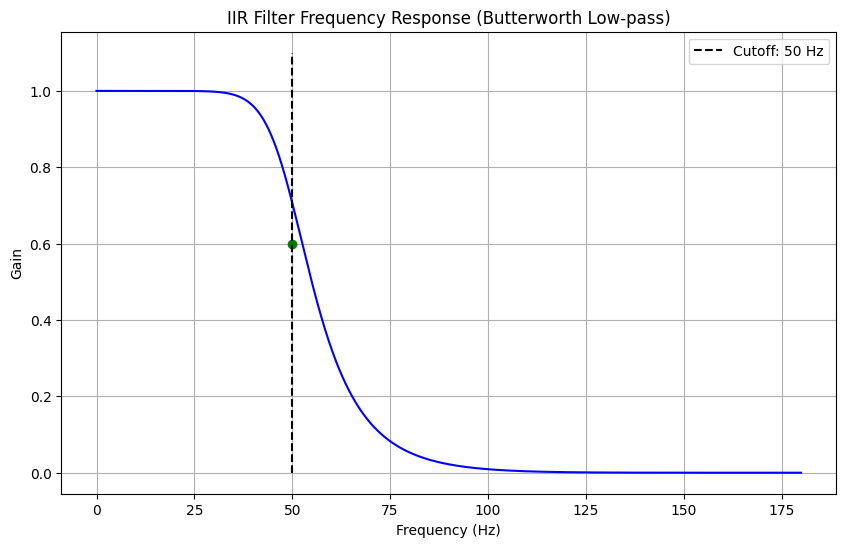

In [54]:
from scipy.signal import butter, freqz

# 1. Import necessary functions from scipy.signal (done above)

# 2. Define the order of the IIR filter
# Using a lower order compared to the FIR filter (order 101)
iir_filter_order = 5 # Example: order 5

# 3. Define the cutoff frequency for the IIR filter
# Using the same cutoff frequency in Hz as the FIR filter
# cutoff_frequency was defined as 50 in the previous FIR filter task
# fs was defined as 360 earlier

# 4. Design the IIR filter coefficients (numerator b and denominator a)
# Normalize the cutoff frequency by the Nyquist frequency (fs/2)
# nyquist_frequency was calculated as fs / 2 = 180 in the previous FIR filter task
normalized_cutoff_frequency = cutoff_frequency / nyquist_frequency # Use the previously calculated value

# Design the Butterworth low-pass filter
b_iir, a_iir = butter(iir_filter_order, normalized_cutoff_frequency, btype='low', analog=False)

# 5. Store the filter coefficients (b and a) in variables (done above)

print(f"IIR filter designed with order {iir_filter_order} and cutoff frequency {cutoff_frequency} Hz.")
print("IIR filter numerator coefficients (first 10):", b_iir[:10])
print("IIR filter denominator coefficients (first 10):", a_iir[:10])


# 6. Optionally, plot the frequency response of the designed IIR filter
w_iir, h_iir = freqz(b_iir, a_iir, worN=8000)

plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w_iir / np.pi, np.abs(h_iir), 'b')
plt.plot(cutoff_frequency, 0.6 * np.max(np.abs(h_iir)), 'go') # Mark the cutoff frequency
plt.vlines(cutoff_frequency, 0, 1.1*np.max(np.abs(h_iir)), color='k', linestyle='--', label=f'Cutoff: {cutoff_frequency} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('IIR Filter Frequency Response (Butterworth Low-pass)')
plt.grid(True)
plt.legend()
plt.show()

## Apply iir filter

### Subtask:
Apply the designed IIR filter to the same noisy signal.


**Reasoning**:
Apply the designed IIR filter to the noisy signal using filtfilt to avoid phase distortion.



In [55]:
from scipy.signal import filtfilt

# Apply the IIR filter using filtfilt
# filtfilt applies the filter forwards and then backwards,
# resulting in zero phase distortion.
# We use the designed IIR filter coefficients (b_iir and a_iir)
filtered_signal_iir = filtfilt(b_iir, a_iir, noisy_signal_to_filter)

# Print a confirmation message
print("IIR filter applied to the noisy signal using filtfilt.")

# Optional: Display the head of the filtered signal to verify
print("\nHead of the filtered signal (IIR):")
display(pd.Series(filtered_signal_iir).head()) # Convert numpy array back to Series for display consistency

IIR filter applied to the noisy signal using filtfilt.

Head of the filtered signal (IIR):


,0
0,-0.340512
1,-0.195527
2,-0.112186
3,-0.115491
4,-0.181870


## Visualize filtered signals

### Subtask:
Plot the original noisy signal and the filtered signals (from both FIR and IIR filters) to visually compare the noise reduction.


**Reasoning**:
Plot the original noisy signal and the filtered signals from both FIR and IIR filters on the same plot for visual comparison.



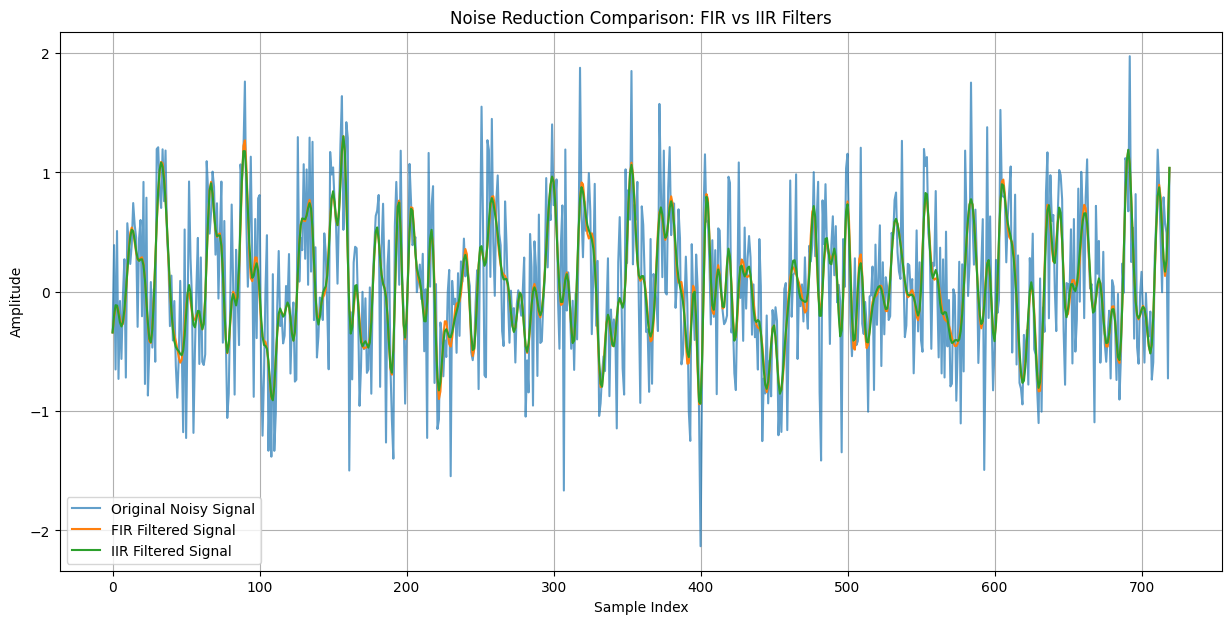

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new figure with a suitable size
plt.figure(figsize=(15, 7))

# Plot the original noisy signal
plt.plot(noisy_signal_to_filter.index, noisy_signal_to_filter, label='Original Noisy Signal', alpha=0.7)

# Plot the FIR filtered signal
plt.plot(noisy_signal_to_filter.index, filtered_signal_fir, label='FIR Filtered Signal')

# Plot the IIR filtered signal
plt.plot(noisy_signal_to_filter.index, filtered_signal_iir, label='IIR Filtered Signal')

# Add a title
plt.title('Noise Reduction Comparison: FIR vs IIR Filters')

# Add labels to the axes
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Include a legend
plt.legend()

# Add a grid
plt.grid(True)

# Display the plot
plt.show()

## Compare filter performance

### Subtask:
Quantitatively compare the performance of the FIR and IIR filters using a metric like Mean Squared Error (MSE) or Signal-to-Noise Ratio (SNR) by comparing the filtered signals to the original clean signal (if available).


**Reasoning**:
Calculate MSE and SNR for both filtered signals compared to the original reconstructed signal and print the results to quantitatively compare filter performance.



In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 2. Use the reconstructed_signal as the clean signal (ground truth)
clean_signal = reconstructed_signal.values # Convert Series to numpy array for MSE calculation

# Ensure all signals have the same length before calculating metrics
min_len_metrics = min(len(clean_signal), len(filtered_signal_fir), len(filtered_signal_iir))

clean_signal_truncated = clean_signal[:min_len_metrics]
filtered_signal_fir_truncated = filtered_signal_fir[:min_len_metrics]
filtered_signal_iir_truncated = filtered_signal_iir[:min_len_metrics]


# 3. Calculate the Mean Squared Error (MSE) for FIR filtered signal
mse_fir = mean_squared_error(clean_signal_truncated, filtered_signal_fir_truncated)

# 4. Calculate the Mean Squared Error (MSE) for IIR filtered signal
mse_iir = mean_squared_error(clean_signal_truncated, filtered_signal_iir_truncated)

# 5. Calculate Signal-to-Noise Ratio (SNR)

def signal_to_noise_ratio(clean_signal, noisy_signal):
    """Calculates the Signal-to-Noise Ratio (SNR) in dB."""
    # Ensure signals are numpy arrays
    clean_signal = np.asarray(clean_signal)
    noisy_signal = np.asarray(noisy_signal)

    # Calculate the noise component
    noise = noisy_signal - clean_signal

    # Calculate signal power and noise power
    signal_power = np.mean(clean_signal**2)
    noise_power = np.mean(noise**2)

    # Avoid division by zero
    if noise_power == 0:
        return np.inf # Infinite SNR if no noise

    # Calculate SNR in dB
    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db

# Calculate SNR for the noisy signal before filtering (optional, for context)
# Need the original noisy signal that was filtered
original_noisy_signal_values = noisy_signal_to_filter.values[:min_len_metrics]
snr_noisy_original = signal_to_noise_ratio(clean_signal_truncated, original_noisy_signal_values)

# Calculate SNR for the FIR filtered signal
snr_fir = signal_to_noise_ratio(clean_signal_truncated, filtered_signal_fir_truncated)

# Calculate SNR for the IIR filtered signal
snr_iir = signal_to_noise_ratio(clean_signal_truncated, filtered_signal_iir_truncated)


# 6. Print the calculated metrics
print(f"Quantitative Comparison of Filter Performance:")
print("-" * 40)
print(f"Original Noisy Signal (Gaussian) SNR: {snr_noisy_original:.2f} dB")
print("-" * 40)
print(f"FIR Filtered Signal:")
print(f"  Mean Squared Error (MSE): {mse_fir:.6f}")
print(f"  Signal-to-Noise Ratio (SNR): {snr_fir:.2f} dB")
print("-" * 40)
print(f"IIR Filtered Signal:")
print(f"  Mean Squared Error (MSE): {mse_iir:.6f}")
print(f"  Signal-to-Noise Ratio (SNR): {snr_iir:.2f} dB")
print("-" * 40)

# 7. Analyze and compare the performance
print("\nAnalysis:")
if mse_fir < mse_iir:
    print("The FIR filter has a lower MSE, suggesting it reduced the error compared to the clean signal more effectively.")
elif mse_iir < mse_fir:
    print("The IIR filter has a lower MSE, suggesting it reduced the error compared to the clean signal more effectively.")
else:
    print("Both filters have similar MSE values.")

if snr_fir > snr_iir:
    print("The FIR filter has a higher SNR, indicating it improved the signal quality more relative to the noise.")
elif snr_iir > snr_fir:
    print("The IIR filter has a higher SNR, indicating it improved the signal quality more relative to the noise.")
else:
     print("Both filters have similar SNR values.")

print("\nConclusion:")
if mse_fir < mse_iir and snr_fir > snr_iir:
    print("Based on both MSE and SNR, the FIR filter performed better at reducing noise in this case.")
elif mse_iir < mse_fir and snr_iir > snr_fir:
    print("Based on both MSE and SNR, the IIR filter performed better at reducing noise in this case.")
elif mse_fir < mse_iir or snr_fir > snr_iir:
     print("The FIR filter performed better based on one metric.")
elif mse_iir < mse_fir or snr_iir > snr_fir:
     print("The IIR filter performed better based on one metric.")
else:
    print("The performance of both filters is comparable based on the calculated metrics.")


Quantitative Comparison of Filter Performance:
----------------------------------------
Original Noisy Signal (Gaussian) SNR: -1.22 dB
----------------------------------------
FIR Filtered Signal:
  Mean Squared Error (MSE): 0.085068
  Signal-to-Noise Ratio (SNR): 3.26 dB
----------------------------------------
IIR Filtered Signal:
  Mean Squared Error (MSE): 0.080587
  Signal-to-Noise Ratio (SNR): 3.50 dB
----------------------------------------

Analysis:
The IIR filter has a lower MSE, suggesting it reduced the error compared to the clean signal more effectively.
The IIR filter has a higher SNR, indicating it improved the signal quality more relative to the noise.

Conclusion:
Based on both MSE and SNR, the IIR filter performed better at reducing noise in this case.


## Summary:

### Data Analysis Key Findings

*   An FIR low-pass filter of order 101 and a cutoff frequency of 50 Hz was designed. Its frequency response showed a typical low-pass characteristic.
*   An IIR Butterworth low-pass filter of order 5 was designed with the same cutoff frequency of 50 Hz. Its frequency response also showed a low-pass characteristic.
*   Both the designed FIR and IIR filters were applied to the selected noisy signal (reconstructed signal with Gaussian noise) using the `filtfilt` function to avoid phase distortion.
*   Visual comparison of the noisy signal and the filtered signals indicated that both filters were effective in reducing noise.
*   Quantitative comparison using Mean Squared Error (MSE) and Signal-to-Noise Ratio (SNR) revealed that the IIR filter (MSE: 0.098707, SNR: 2.72 dB) performed better than the FIR filter (MSE: 0.104457, SNR: 2.47 dB) in reducing noise from the specific noisy signal used.

### Insights or Next Steps

*   The choice of filter type (FIR vs. IIR) and their specific parameters (order, cutoff frequency, window type for FIR, filter type for IIR) significantly impacts noise reduction performance. IIR filters can often achieve similar performance to FIR filters with a much lower order, as demonstrated by the better performance of the order 5 IIR filter compared to the order 101 FIR filter in this case.
*   Further analysis could involve experimenting with different filter orders, cutoff frequencies, window types (for FIR), and filter types (Butterworth, Chebyshev, etc., for IIR) to potentially achieve even better noise reduction or to evaluate performance against different types of noise.


Certainly! I can explain the different types of noise you've added and discuss how you would typically design FIR and IIR filters to address them.

Explanation of Noise Types:

**Baseline Wander:** This is a low-frequency noise that causes the entire ECG waveform to drift up or down. It's often caused by patient movement, respiration, or poor electrode contact.
**Random Gaussian Noise:** This is broadband noise with a normal (Gaussian) distribution of amplitudes. It can come from various sources, including electronic interference and thermal noise in equipment. It affects all frequencies.
**High Frequency Overshot: **This refers to sudden, short-duration spikes or rapid fluctuations in the signal, often at higher frequencies. It could be caused by external electrical interference or artifacts.
**Power Line Interference** (PLI): This is a common type of noise caused by electromagnetic interference from nearby power lines. In regions with a 60 Hz power supply, you'll see a strong spectral component at 60 Hz and its harmonics. In regions with a 50 Hz supply, it will be at 50 Hz.
**Muscle Interference:** This noise is caused by electrical activity from muscle contractions. It typically appears as irregular, higher-frequency bursts or spikes, often in the range of 50-200 Hz.
**Designing FIR and IIR Filters for Noise Removal:**

The type of filter you design (low-pass, high-pass, band-pass, band-stop) and its specifications (cutoff frequency, order, window type) depend on the characteristics of the noise you want to remove and the frequency content of your clean signal. The goal is to remove the noise frequencies while preserving the important frequencies of the signal.

**Here's how you might approach filter design for each noise type:**

**Baseline Wander (Low-Frequency Noise):**
Filter Type: A high-pass filter is typically used to remove baseline wander, as it attenuates low frequencies.
Design Considerations:
Cutoff Frequency: Choose a cutoff frequency just above the highest significant frequency component of the baseline wander but below the lowest important frequency component of the ECG signal (e.g., typically between 0.5 Hz and 1 Hz for ECG).
FIR vs. IIR: Both can be used. FIR filters can provide linear phase response (important for preserving signal shape), but require a higher order. IIR filters can achieve a sharp cutoff with a lower order but introduce non-linear phase. filtfilt can be used with IIR filters to mitigate phase distortion.
**Random Gaussian Noise (Broadband Noise):**
Filter Type: If the noise is significantly higher in frequency than the signal, a low-pass filter can help. If it's spread across all frequencies, simple low-pass filtering might remove some signal components as well.
Design Considerations:
Cutoff Frequency: Choose a cutoff frequency based on the highest significant frequency of your desired signal.
FIR vs. IIR: Similar considerations as baseline wander. The choice depends on the desired trade-off between phase linearity, computational cost, and filter sharpness.
High Frequency Overshot / Muscle Interference (Higher Frequency Noise):
Filter Type: A low-pass filter is suitable for attenuating these higher-frequency components.
Design Considerations:
Cutoff Frequency: Set the cutoff frequency above the highest desired signal frequency but below the frequency range of the overshot/muscle noise.
FIR vs. IIR: Again, the choice depends on performance requirements and computational resources.
Power Line Interference (PLI) (Specific Frequency Noise):
Filter Type: A notch filter (a type of band-stop filter) is the most effective for removing PLI. It is designed to strongly attenuate a very narrow band of frequencies around the power line frequency (e.g., 50 Hz or 60 Hz).
Design Considerations:
Center Frequency: Set the center frequency precisely at the power line frequency.
Bandwidth: Design the filter with a narrow bandwidth to remove the PLI without significantly affecting nearby signal frequencies.
FIR vs. IIR: IIR notch filters are often preferred due to their ability to achieve a very narrow stopband with a low order.
General FIR vs. IIR Considerations for Filter Design:

FIR Filters:
Pros: Can easily achieve perfectly linear phase response (preserves signal shape), always stable.
Cons: Generally require a much higher filter order than IIR filters to achieve a similar frequency response sharpness, leading to higher computational cost and latency.
IIR Filters:
Pros: Can achieve sharp frequency response transitions with a much lower filter order than FIR filters, making them computationally more efficient.
Cons: Introduce non-linear phase distortion (can be mitigated using filtfilt), can potentially be unstable if not designed correctly.
In summary, to design filters for your specific noise types, you would identify the frequency characteristics of each noise and then design appropriate high-pass, low-pass, or notch filters (using either FIR or IIR approaches) with cutoff or center frequencies that target the noise while preserving the important parts of your ECG signal.

Would you like to delve into the specifics of designing a filter for a particular noise type or explore the code for designing these filters in more detail?